# Postprocessing and topic visualization

This notebook can be used to upload previously generated topic modeling data and represent it with multiple visualisation methods. The heatmap and bar chart visualisations of topics are addapted from <a href="https://github.com/DARIAH-DE/Topics"><i>Topics</i> (DARIAH-DE)</a> notebook IntroducingMallet.ipynb for the roject DiSpecs. The original text is kept and marked in italic. 


In [1]:
import warnings
warnings.filterwarnings('ignore')
# for data:
#from cophi_toolbox import preprocessing
#from dariah_topics import utils
from dariah_topics import postprocessing
from dariah_topics import visualization
import metadata_toolbox.utils as metadata
import pandas as pd
from pathlib import Path
import os
import numpy as np
import sys
# for visualisations:
## bokeh
from bokeh.io import output_notebook, show
output_notebook()
from bokeh.io import export_png
from bokeh.plotting import figure, output_file, show 
## wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline 

Loading BokehJS ...


# Upload topics and document-topic matrix

In [2]:
# Path variables
data = 'Y:/data/projekte/dispecs/TopicModeling' 
language = 'fr'
path_to_corpus = Path(data, 'dispecs_'+language+'_paragr')
output = data + '/output/Dariah_IntroducingMallet/'+language+'/20210520_n25_i2000_opt20_paragr/'

In [3]:
#output = "Y:\data\projekte\dispecs\topicModelling\TM_Visualisierungen\Dariah_IntroducingMallet\it\\20200211_n22_i2000_opt20_paragraph_minlen500w"
topic_keys_output = "20210520-1036_topic_keys_n25_i2000_opt20.txt"
doc_topics_output = "20210520-1036_doc_topics_n25_i2000_opt20.txt"

# Read results of topic modeling

In [4]:
topics = postprocessing.show_topics(topic_keys_file=str(Path(output, topic_keys_output)))
topics

Key 0     Key 1     Key 2        Key 3        Key 4       Key 5  \
Topic 0      auteur    lettre   ouvrage        livre       écrire      public   
Topic 1       crime      mort      coup       ennemi      honneur  malheureux   
Topic 2      nature      idée       ame        corps  imagination       objet   
Topic 3     manière    savoir    espece       propre    caractere      merite   
Topic 4       fille     jeune      pere      mariage         fils        mere   
Topic 5      madame       ami     disje        estce        étois         oui   
Topic 6      penser    vérité       mal         vrai      honneur         ami   
Topic 7         vin     ville     boire        table       passer      savoir   
Topic 8     maniére    savoir      idée  imagination     pourtant        sens   
Topic 9       vertu    mérite       vie       nature          ame      hommes   
Topic 10     argent     riche     payer      fortune       pauvre    marchand   
Topic 11      terre       eau       mer         bois        arbre    montagne   
Topic 12      poète    auteur   thèatre          art         goût     comédie   
Topic 13      paris     ville  avanture       madame       maitre        part   
Topic 14    manière     égard  discours          vie          ami        lieu   
Topic 15     savoir     temps    peuple      liberté   révolution      lorsqu   
Topic 16        vie      mort    mourir          mal      maladie      malade   
Topic 17  réfléxion      pére       jeu    médisance      éxemple       estil   
Topic 18    heureux      dieu      doux         oeil       tendre        main   
Topic 19   religion      dieu    eglise        saint     divinité         foi   
Topic 20        roi    prince    peuple       france       guerre        etat   
Topic 21      aimer    sentir   bonheur      passion       lettre       amant   
Topic 22       dame    quoiqu     égard      manière      passion         tem   
Topic 23     maison  demander     heure      chambre     paraître       jeune   
Topic 24        air       bel      sexe         dame       beauté       jeune   

                Key 6     Key 7      Key 8       Key 9      Key 10     Key 11  \
Topic 0          lire  histoire    feuille     lecteur      volume      titre   
Topic 1      coupable   justice       main      fureur    criminel      cruel   
Topic 2    philosophe    humain       dieu      former      infini   principe   
Topic 3   imagination    nombre        air        gout       genie    dessein   
Topic 4          mari   famille       père         âge       enfan     marier   
Topic 5          aime  pourtant       vrai    répondre        rire      ditil   
Topic 6     réflexion     juger    mauvais      défaut    répondre  caractere   
Topic 7         heure     caffé      vieux      manger        soir       tête   
Topic 8     ordinaire  ridicule  caractére      vérité      propre    moindre   
Topic 9        propre   bonheur       vice     passion     heureux   conduite   
Topic 10     commerce     moyen    famille        prix       somme     vendre   
Topic 11          air   couleur     milieu      figure    agréable    remplir   
Topic 12     tragédie   ouvrage      poème    critique         bel      génie   
Topic 13          tem   honneur     galant        mari       quell     pareil   
Topic 14       servir  occasion   làdessus      savoir    agréable     plûtôt   
Topic 15      citoyen       loi    société  république  spectateur       père   
Topic 16      douleur    triste     perdre       santé     malheur      vivre   
Topic 17        asser      cour       vice      danois   dannemarc   peutètre   
Topic 18         ciel       ame       voix         feu     aimable     charme   
Topic 19     chrétien    prêtre     vérité      clergé      sermon       curé   
Topic 20    politique      cour     nation      europe      empire    général   
Topic 21     sentimen    tendre     moment  malheureux     douleur       aime   
Topic 22         sexe   mauvais     propre  

By default, the data frame `document_topics` (see below) contains the first 3 keys for each topic. You can keep it this way, but another possibility is to replace those 3-key-labels with manually assigned labels. These labels can be based on your interpretation of the topic keys (e.g. "Theater", "Domestic life", "Agriculture") or some kind of non-sematic label (e.g. "Topic 0", "Topic 1", "Topic 2"). We chose to set labels acording to the second option. 
<br><br>
We will therefore add a new column to the data frame topics and call it "lables". To this column, we will simply copy the index labels, but you can also define the labels in the variable `labels` manually. 

In [5]:
labels = []
for row in topics.index:
    labels.append(row)
labels

topics.insert(loc=0, column='labels', value=labels)
topics

labels      Key 0     Key 1     Key 2        Key 3        Key 4  \
Topic 0    Topic 0     auteur    lettre   ouvrage        livre       écrire   
Topic 1    Topic 1      crime      mort      coup       ennemi      honneur   
Topic 2    Topic 2     nature      idée       ame        corps  imagination   
Topic 3    Topic 3    manière    savoir    espece       propre    caractere   
Topic 4    Topic 4      fille     jeune      pere      mariage         fils   
Topic 5    Topic 5     madame       ami     disje        estce        étois   
Topic 6    Topic 6     penser    vérité       mal         vrai      honneur   
Topic 7    Topic 7        vin     ville     boire        table       passer   
Topic 8    Topic 8    maniére    savoir      idée  imagination     pourtant   
Topic 9    Topic 9      vertu    mérite       vie       nature          ame   
Topic 10  Topic 10     argent     riche     payer      fortune       pauvre   
Topic 11  Topic 11      terre       eau       mer         bois        arbre   
Topic 12  Topic 12      poète    auteur   thèatre          art         goût   
Topic 13  Topic 13      paris     ville  avanture       madame       maitre   
Topic 14  Topic 14    manière     égard  discours          vie          ami   
Topic 15  Topic 15     savoir     temps    peuple      liberté   révolution   
Topic 16  Topic 16        vie      mort    mourir          mal      maladie   
Topic 17  Topic 17  réfléxion      pére       jeu    médisance      éxemple   
Topic 18  Topic 18    heureux      dieu      doux         oeil       tendre   
Topic 19  Topic 19   religion      dieu    eglise        saint     divinité   
Topic 20  Topic 20        roi    prince    peuple       france       guerre   
Topic 21  Topic 21      aimer    sentir   bonheur      passion       lettre   
Topic 22  Topic 22       dame    quoiqu     égard      manière      passion   
Topic 23  Topic 23     maison  demander     heure      chambre     paraître   
Topic 24  Topic 24        air       bel      sexe         dame       beauté   

               Key 5        Key 6     Key 7      Key 8  ...      Key 10  \
Topic 0       public         lire  histoire    feuille  ...      volume   
Topic 1   malheureux     coupable   justice       main  ...    criminel   
Topic 2        objet   philosophe    humain       dieu  ...      infini   
Topic 3       merite  imagination    nombre        air  ...       genie   
Topic 4         mere         mari   famille       père  ...       enfan   
Topic 5          oui         aime  pourtant       vrai  ...        rire   
Topic 6          ami    réflexion     juger    mauvais  ...    répondre   
Topic 7       savoir        heure     caffé      vieux  ...        soir   
Topic 8         sens    ordinaire  ridicule  caractére  ...      propre   
Topic 9       hommes       propre   bonheur       vice  ...     heureux   
Topic 10    marchand     commerce     moyen    famille  ...       somme   
Topic 11    montagne          air   couleur     milieu  ...    agréable   
Topic 12     comédie     tragédie   ouvrage      poème  ...         bel   
Topic 13        part          tem   honneur     galant  ...       quell   
Topic 14        lieu       servir  occasion   làdessus  ...    agréable   
Topic 15      lorsqu      citoyen       loi    société  ...  spectateur   
Topic 16      malade      douleur    triste     perdre  ...     malheur   
Topic 17       estil        asser      cour       vice  ...   dannemarc   
Topic 18        main         ciel       ame       voix  ...     aimable   
Topic 19         foi     chrétien    prêtre     vérité  ...      sermon   
Topic 20        etat    politique      cour     nation  ...      empire   
Topic 21       amant     sentimen    tendre     moment  ...     douleur   
Topic 22         tem         sexe   mauvais     propre  ...       peine   
Topic 23       jeune          tem      main      peine  ...      entrer   
Topic 24       jeune       visage      oeil     plaire  ...        mode   

      

Create the `document_topics` with manually defined labels using the following code. To instead use the 3-key-labels (or n-key-labels), leave out the argument `num_keys`, since 3 is the default value, or change the number of keys to your own preference.

In [6]:
document_topics = postprocessing.show_document_topics(topics=topics, num_keys=1,
                                                      doc_topics_file=str(Path(output, doc_topics_output)))
document_topics[:30]

1711-1712_Le-Misantrope_Justus-Van-Effen_Vol-1_Nr-001_2948_0000  \
Topic 0                                              0.5246                 
Topic 1                                              0.0035                 
Topic 2                                              0.0028                 
Topic 3                                              0.0017                 
Topic 4                                              0.0024                 
Topic 5                                              0.0024                 
Topic 6                                              0.0244                 
Topic 7                                              0.0027                 
Topic 8                                              0.1068                 
Topic 9                                              0.1322                 
Topic 10                                             0.0718                 
Topic 11                                             0.0019                 
Topic 12                                             0.0023                 
Topic 13                                             0.0016                 
Topic 14                                             0.0376                 
Topic 15                                             0.0016                 
Topic 16                                             0.0026                 
Topic 17                                             0.0007                 
Topic 18                                             0.0023                 
Topic 19                                             0.0014                 
Topic 20                                             0.0026                 
Topic 21                                             0.0047                 
Topic 22                                             0.0019                 
Topic 23                                             0.0595                 
Topic 24                                             0.0040                 

          1711-1712_Le-Misantrope_Justus-Van-Effen_Vol-1_Nr-002_2949_0000  \
Topic 0                                              0.2561                 
Topic 1                                              0.0294                 
Topic 2                                              0.0009                 
Topic 3                                              0.0006                 
Topic 4                                              0.0008                 
Topic 5                                              0.2216                 
Topic 6                                              0.0023                 
Topic 7                                              0.0009                 
Topic 8                                              0.1650                 
Topic 9                                              0.1337                 
Topic 10                                             0.0008                 
Topic 11                                             0.0006                 
Topic 12                                             0.0291                 
Topic 13                                             0.0005                 
Topic 14                                             0.0236                 
Topic 15                                             0.0005                 
Topic 16                                             0.0008                 
Topic 17                                             0.0342                 
Topic 18                                             0.0007                 
Topic 19                                             0.0004                 
Topic 20                                             0.0122                 
Topic 21                                             0.0015                 
Topic 22                                             0.0006                 
Topic 23                                             0.0590                 
Topic 24                                             0.0240                 

    

# Average topic values in periodicals

This part is based on recommendations from Allen Riddell's [TATOM](https://liferay.de.dariah.eu/tatom/).

Use this code if you wan't to group the resaults by a certain feature, like for example periodical issue, author or year.  

Getting the file names and saving in a list:

In [7]:
filenames = [os.path.join(path_to_corpus, fn) for fn in sorted(os.listdir(path_to_corpus))]

Getting periodical names from file names (depends on the structure of your file names) and saving in a list:

In [8]:
periodicals = [(os.path.basename(filename).split('_')[1]) for filename in filenames]

Check your periodical list:

In [9]:
periodicals[:5]

['Le-Misantrope',
 'Le-Misantrope',
 'Le-Misantrope',
 'Le-Misantrope',
 'Le-Misantrope']

Turn the periodical list into a set of unique names and sort them alphabetically:

In [10]:
periodicals_unique = sorted(set(periodicals))
periodicals_unique

['L-Indigent-philosophe-ou-l-homme-sans-souci',
 'La-Bagatelle',
 'La-Bigarure',
 'La-Spectatrice',
 'La-Spectatrice-Ouvrage-traduit-de-l-anglois',
 'La-Spectatrice-danoise-ou-l-Aspasie-moderne',
 'Le-Cabinet-du-Philosophe',
 'Le-Censeur-ou-Caractères-des-Mœurs-de-la-Haye',
 'Le-Mentor-moderne',
 'Le-Misantrope',
 'Le-Monde',
 'Le-Monde-comme-il-est',
 'Le-Nouveau-Spectateur',
 'Le-Nouveau-Spectateur-français',
 'Le-Philosophe-Nouvelliste',
 'Le-Spectateur-français-avant-la-Révolution',
 'Le-Spectateur-françois',
 'Le-Spectateur-françois-ou-Journal-des-Mœurs',
 'Le-Spectateur-françois-ou-le-nouveau-Socrate-moderne',
 'Le-Spectateur-françois-pendant-le-gouvernement-révolutionnaire',
 'Le-Spectateur-inconnu',
 'Le-Spectateur-moderne',
 'Le-Spectateur-ou-le-Socrate-moderne',
 'Le-Spectateur-suisse',
 'Les-Chiffons']

Use the `document_topics matrix` to create a new matrix with mean values for each periodical.

In [11]:
document_topics_periodicals = document_topics.groupby(periodicals, axis=1).mean().values

In [12]:
document_topics_periodicals

array([[3.25631579e-02, 6.47688889e-02, 6.85915528e-02, 4.83310811e-02,
        3.66782271e-02, 5.29720000e-02, 3.47246914e-02, 6.21281250e-02,
        3.55800459e-02, 3.35000000e-02, 4.58828729e-02, 4.01972067e-02,
        3.74627747e-02, 3.17471698e-02, 8.95053435e-02, 2.69775148e-02,
        3.42722689e-02, 5.41736559e-02, 7.36637037e-02, 2.74518519e-02,
        7.40701299e-02, 4.18333333e-02, 4.37014245e-02, 7.61222222e-02,
        7.55370370e-02],
       [1.21052632e-02, 2.77829630e-02, 4.34557764e-02, 1.84351351e-02,
        2.37769829e-02, 3.32384000e-02, 2.06641975e-02, 4.37921875e-02,
        3.97720183e-02, 4.03708763e-02, 3.05077348e-02, 3.44798883e-02,
        3.24851648e-02, 2.55160377e-02, 3.02129771e-02, 4.67443787e-02,
        3.02974790e-02, 4.21064516e-02, 3.31051852e-02, 7.74125926e-02,
        6.30194805e-02, 4.99500000e-02, 2.81186135e-02, 2.17777778e-03,
        2.41407407e-02],
       [1.00315789e-02, 3.32811111e-02, 1.53783851e-02, 5.18445946e-02,
        4.1727

Transform the new matrix into a Pandas DataFrame Object:

In [13]:
document_topics_periodicals = pd.DataFrame(data=document_topics_periodicals, columns=periodicals_unique, index=document_topics.index)

In [14]:
document_topics_periodicals

L-Indigent-philosophe-ou-l-homme-sans-souci  La-Bagatelle  \
Topic 0                                      0.032563      0.064769   
Topic 1                                      0.012105      0.027783   
Topic 2                                      0.010032      0.033281   
Topic 3                                      0.003579      0.004228   
Topic 4                                      0.015111      0.011348   
Topic 5                                      0.271768      0.019609   
Topic 6                                      0.106092      0.041454   
Topic 7                                      0.112358      0.043051   
Topic 8                                      0.021403      0.272362   
Topic 9                                      0.082179      0.152319   
Topic 10                                     0.036947      0.023690   
Topic 11                                     0.005084      0.016590   
Topic 12                                     0.027739      0.028168   
Topic 13                                     0.005218      0.005726   
Topic 14                                     0.010942      0.007705   
Topic 15                                     0.005142      0.006170   
Topic 16                                     0.024076      0.013202   
Topic 17                                     0.001889      0.001126   
Topic 18                                     0.004453      0.035097   
Topic 19                                     0.003195      0.014560   
Topic 20                                     0.009097      0.030709   
Topic 21                                     0.034597      0.022094   
Topic 22                                     0.006000      0.005434   
Topic 23                                     0.097611      0.044601   
Topic 24                                     0.060776      0.074930   

          La-Bigarure  La-Spectatrice  \
Topic 0      0.068592        0.048331   
Topic 1      0.043456        0.018435   
Topic 2      0.015378        0.051845   
Topic 3      0.008144        0.080312   
Topic 4      0.031360        0.038012   
Topic 5      0.016638        0.126381   
Topic 6      0.045219        0.109797   
Topic 7      0.032054        0.037118   
Topic 8      0.009133        0.013758   
Topic 9      0.060302        0.165685   
Topic 10     0.034443        0.022551   
Topic 11     0.022091        0.009264   
Topic 12     0.044894        0.013936   
Topic 13     0.233587        0.006197   
Topic 14     0.012768        0.022658   
Topic 15     0.006545        0.003935   
Topic 16     0.024103        0.040196   
Topic 17     0.000914        0.006459   
Topic 18     0.042026        0.006930   
Topic 19     0.025496        0.003011   
Topic 20     0.041362        0.013557   
Topic 21     0.035214        0.034592   
Topic 22     0.008551        0.012784   
Topic 23     0.107779        0.050672   
Topic 24     0.029947        0.063576   

          La-Spectatrice-Ouvrage-traduit-de-l-anglois  \
Topic 0                                      0.036678   
Topic 1                                      0.023777   
Topic 2                                      0.041727   
Topic 3                                      0.007467   
Topic 4                                      0.032321   
Topic 5                                      0.006414   
Topic 6                                      0.040635   
Topic 7                                      0.017637   
Topic 8                                      0.010172   
Topic 9                                      0.128695   
Topic 10                                     0.014849   
Topic 11                                     0.027286   
Topic 12                                     0.013616   
Topic 13                                     0.003892   
Topic 14                                     0.009281   
Topic 15                                     0.007722   
Topic 16                                     0.023011   
Topic 17                                     0.000943   
Topic 18     

You can also save the matrix as an excel file, if you need it for future work:

In [15]:
document_topics_periodicals.to_excel(str(Path(output, language+"_periodicals.xlsx")))

# Visualizing

## Word cloud visualization

To visualize the collection with a word cloud, we will use the list of the most frequent words.

In [16]:
wordcloud_output = output + 'wordclouds/'
if not os.path.exists(wordcloud_output):
    os.makedirs(wordcloud_output)
wordcloud_output

'Y:/data/projekte/dispecs/TopicModeling/output/Dariah_IntroducingMallet/fr/20210520_n25_i2000_opt20_paragr/wordclouds/'

### MFW in collection

In [17]:
mfw_dict = pd.read_pickle(output+'/20210520-1036_dtl.pkl')
mfw_dict

{'empressement': 121,
 'public': 1942,
 'misantrope': 132,
 'ayer': 455,
 'pû': 578,
 'satisfait': 216,
 'cesser': 292,
 'paroître': 675,
 'feuilles': 100,
 'rester': 523,
 'exemplaire': 51,
 'complets': 8,
 'volume': 450,
 'prix': 666,
 'exhorbitant': 2,
 'edition': 113,
 'croi': 311,
 'agréable': 1108,
 'retrancher': 95,
 'avertissemen': 9,
 'inutiles': 115,
 'auteur': 2470,
 'revoir': 175,
 'ouvrage': 1908,
 'bout': 649,
 'intéresser': 210,
 'curiosité': 390,
 'ajouter': 451,
 'discours': 1501,
 'ractére': 5,
 'espritsforts': 49,
 'incrédules': 33,
 'charité': 271,
 'concerne': 23,
 'aumône': 32,
 'relation': 153,
 'curieux': 347,
 'voyage': 288,
 'suede': 7,
 'réfléxion': 197,
 'caractére': 418,
 'intéressans': 7,
 'addition': 25,
 'considérables': 52,
 'passer': 2949,
 'manière': 2428,
 'renvoyer': 134,
 'lecteur': 855,
 'préface': 91,
 'apellerez': 2,
 'misantropique': 2,
 'nom': 1753,
 'prens': 61,
 'plume': 348,
 'main': 1867,
 'adieu': 244,
 'diraton': 65,
 'finir': 681,
 'bru

In [18]:
x, y = np.ogrid[:1000, :1000]

mask = (x - 500) ** 2 + (y - 500) ** 2 > 400 ** 2
mask = 255 * mask.astype(int)
wordcloud = WordCloud(background_color="white",width=1920, height=1080, mask=mask, colormap='Set1').generate_from_frequencies(mfw_dict)
plt.clf() # This method clears the buffer, so images saved with savefig() don't overlap
plt.title('The French Spectators', color='grey', size=12, y=1.01)
plt.axis("off")
wc = plt.imshow(wordcloud, interpolation="bilinear")
plt.close()
# Save the image in the img folder, but create the folder "wordclouds" first:
fig = wc.figure
fig.set_size_inches(7, 7, forward=True)
fig.tight_layout()
fig.savefig(str(wordcloud_output + "wc_mfw.png"), dpi=500) #, bbox_inches='tight'
# or withou title:
#wordcloud.to_file(str(wordcloud_output + "wc_mfw.png"))

### MFW in periodicals

To make word clouds for each periodical, we will iterate through periodical names, get all files containing the periodical name, and append their content to a single string. From this string, we will remove the same words we removed during the topic modeling prozess as stopwords and visualize the remaining types.   

In [19]:
with open ('Y:/data/projekte/dispecs/TopicModeling/stopwords/'+language+'_features.txt', 'r', encoding='utf-8') as f:
    stopwords = f.read().split()
STOPWORDS.update(stopwords)

for periodical in set(periodicals):
    text = ''
    for filename in filenames:
        if periodical in filename:
            with open(filename, 'r',encoding='utf-8') as f: 
                text = text + ' ' + f.read()
                text = text.lower()  
                
    x, y = np.ogrid[:1000, :1000]
    mask = (x - 500) ** 2 + (y - 500) ** 2 > 400 ** 2
    mask = 255 * mask.astype(int)

    wordcloud = WordCloud(background_color="white",width=1920, height=1080, mask=mask, colormap='Set1').generate(text)
    plt.clf() # This method clears the buffer, so images saved with savefig() don't overlap
    plt.title(periodical.replace("-", " "), color='grey', size=12, y=1.01)  
    plt.axis("off")
    wc = plt.imshow(wordcloud, interpolation="bilinear")
    plt.close()
    
    
    # Save the image in the img folder:
    fig = wc.figure
    fig.set_size_inches(7, 7)#
    fig.tight_layout()
    fig.savefig(str(wordcloud_output + "wc_periodical_" + periodical + ".png"), dpi=500) #, bbox_inches='tight'
    # or without title:
    #wordcloud.to_file(str(wordcloud_output + "wc_periodical_" + periodical + ".png"))

### Keyword weights in topics

In [20]:
# Open the reduced file containing topic word weights
file = open(output+"20210520-1036_topic_word_weights_n25_i2000_opt20_reduced.txt", "r", encoding="utf8")

lines = file.readlines()
file.close()

mfw_all_topics = {}
for line in lines:    
    k = int(line.strip().split("\t", 1)[0])
    v = {line.strip().split("\t", 1)[1].split("\t", 1)[0]: float(line.strip().split("\t", 1)[1].split("\t", 1)[1])}
    if k in mfw_all_topics.keys():
        mfw_all_topics[k].update(v)
    else: 
        mfw_all_topics[k] = v
    
mfw_all_topics

{0: {'empressement': 25.026419114941582,
  'public': 824.0264191149416,
  'misantrope': 14.026419114941582,
  'exemplaire': 26.026419114941582,
  'complets': 6.026419114941583,
  'volume': 440.0264191149416,
  'prix': 92.02641911494159,
  'exhorbitant': 2.026419114941583,
  'edition': 89.02641911494159,
  'agréable': 68.02641911494159,
  'retrancher': 10.026419114941582,
  'avertissemen': 4.026419114941583,
  'auteur': 1416.0264191149415,
  'revoir': 29.026419114941582,
  'ouvrage': 1236.0264191149415,
  'bout': 72.02641911494159,
  'intéresser': 16.026419114941582,
  'curiosité': 95.02641911494159,
  'ajouter': 34.02641911494158,
  'discours': 136.02641911494158,
  'concerne': 18.026419114941582,
  'relation': 48.02641911494158,
  'curieux': 118.02641911494159,
  'addition': 10.026419114941582,
  'considérables': 2.026419114941583,
  'passer': 185.02641911494158,
  'renvoyer': 38.02641911494158,
  'lecteur': 445.0264191149416,
  'préface': 91.02641911494159,
  'nom': 363.0264191149416

In [22]:
x, y = np.ogrid[:1000, :1000]
mask = (x - 500) ** 2 + (y - 500) ** 2 > 400 ** 2
mask = 255 * mask.astype(int)

for key, value in mfw_all_topics.items():   
    topic = {k: v for k, v in sorted(mfw_all_topics.get(key).items(), key=lambda item: item[1], reverse=True)}
    wordcloud = WordCloud(background_color="white",width=1920, height=1080, mask=mask, colormap='Set1').generate_from_frequencies(topic)
    plt.clf() # This method clears the buffer, so images saved with savefig() don't overlap
    plt.title('Topic ' + str(key) + ' in French Spectators', color='grey', size=12, y=1.01)  
    plt.axis("off")
    wc = plt.imshow(wordcloud, interpolation="bilinear")
    plt.close()

    # Save the image in the img folder:
    fig = wc.figure
    fig.set_size_inches(7, 7, forward=True)
    fig.tight_layout()
    fig.savefig(str(wordcloud_output + "wc_topic_" + str(key) + ".png"), dpi=500) #, bbox_inches='tight'
    # or without title:
    #wordcloud.to_file(str(wordcloud_output + "wc_topic_" + str(key) + ".png"))

## Heatmaps and charts


<i>Each topic has a certain probability for each document in the corpus (have a look at the cell</i> [document_topics_periodicals]<i>). This probability distributions are visualized in an interactive **heatmap** (the darker the color, the higher the probability) which displays the kind of information
                that is presumably most useful to literary scholars. Going beyond pure exploration, this visualization can be used to show thematic developments over a set of texts as well as a single text, akin to a dynamic topic model. What might become
                apparent here, is that some topics correlate highly with a specific author or group of authors, while other topics correlate highly with a specific text or group of texts.</i>

In [ ]:
# from bokeh.io import output_notebook, show
# output_notebook()
# %matplotlib inline
# from bokeh.io import export_png
# from bokeh.plotting import figure, output_file, show 

In [23]:
bokeh_output = output + 'bokeh/'
if not os.path.exists(bokeh_output):
    os.makedirs(bokeh_output)
bokeh_output

'Y:/data/projekte/dispecs/TopicModeling/output/Dariah_IntroducingMallet/fr/20210520_n25_i2000_opt20_paragr/bokeh/'

In [24]:
"""
PlotDocumentTopics = visualization.PlotDocumentTopics(document_topics)
show(PlotDocumentTopics.interactive_heatmap(), notebook_handle=True)
"""
output_file(bokeh_output+language+"_heatmap.html")
PlotDocumentTopics = visualization.PlotDocumentTopics(document_topics_periodicals)
show(PlotDocumentTopics.interactive_heatmap(width=1200, height=1000, major_label_text_font_size='14pt'), notebook_handle=True) #width=2000, height=3000,major_label_text_font_size='20pt'

To save a static heatmap or barchart, use the function `savefig`.

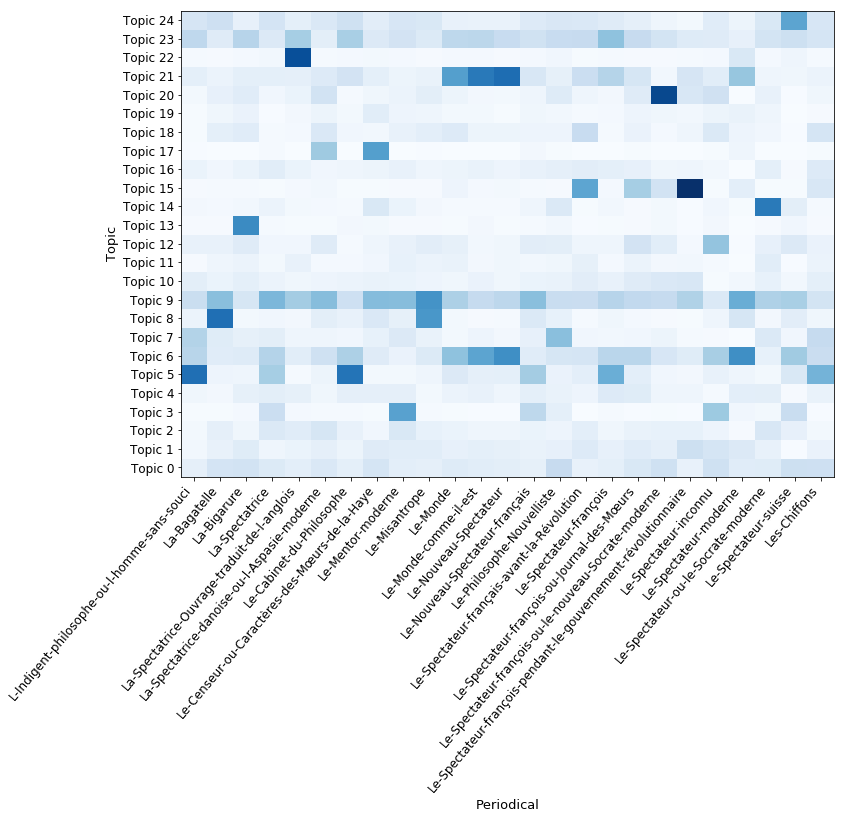

In [25]:
static_heatmap = PlotDocumentTopics.static_heatmap(xlabel="Periodical", figsize=(11.7, 8.3)) #figsize = A4: 11.7, 8.3, default: 10.416666666666666, 6.25
static_heatmap.show()
static_heatmap.savefig(bokeh_output + language + "_heatmap.png", format='png', frameon=True, bbox_inches='tight')
static_heatmap.savefig(bokeh_output + language + "_heatmap.pdf", format='pdf', frameon=True, bbox_inches='tight')

To see the topic distribution for a specific periodical, write in its file name in quotation marks or simply its index (example: `0`).

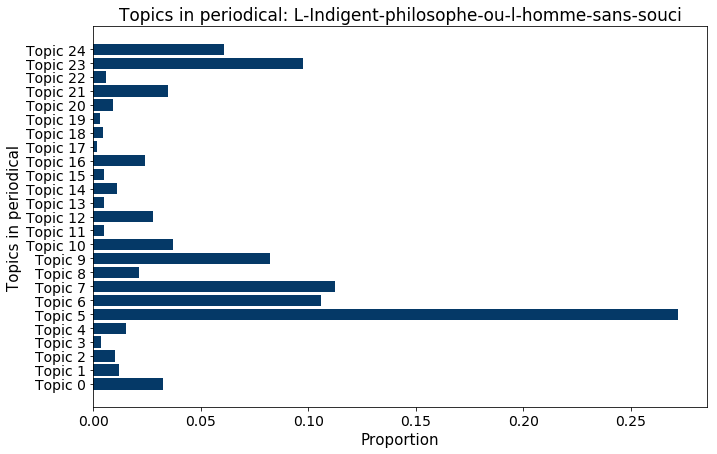

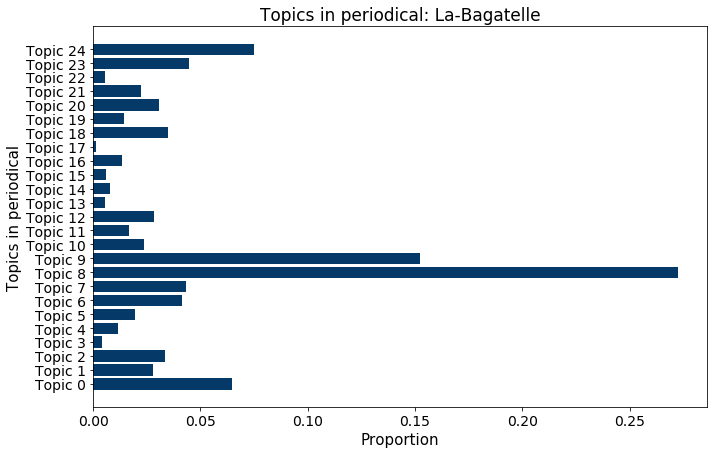

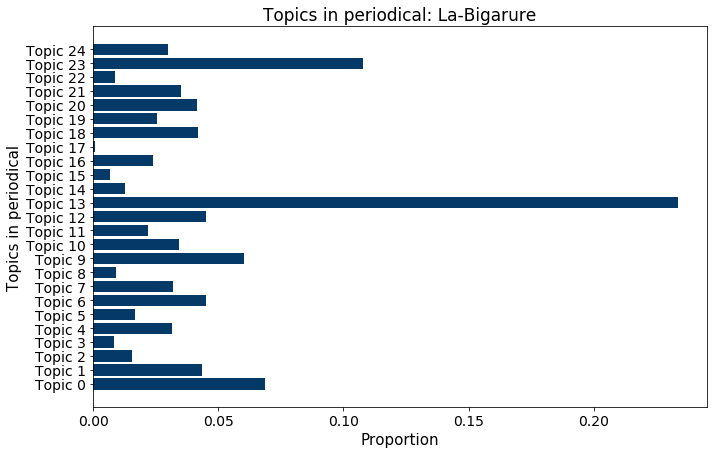

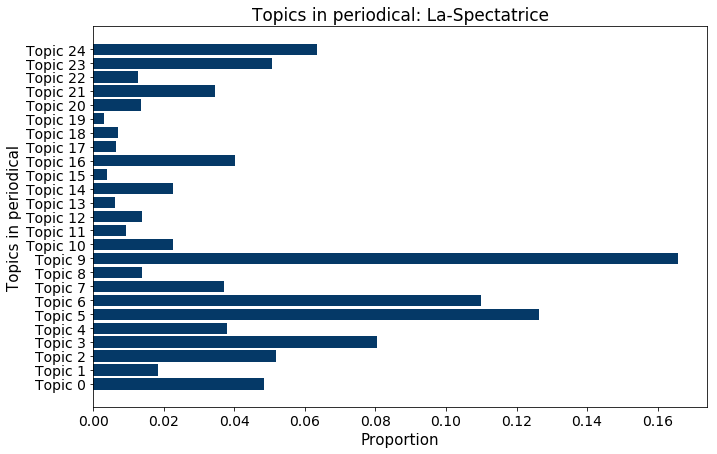

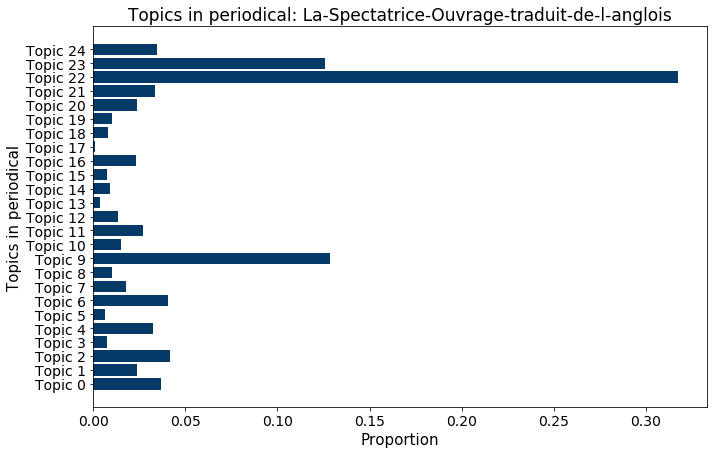

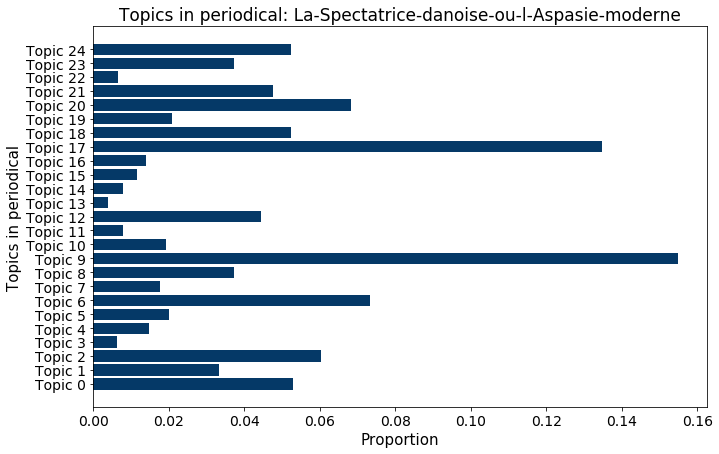

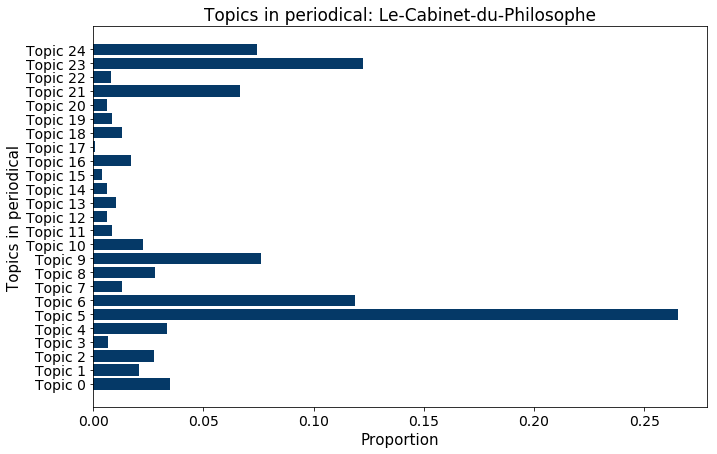

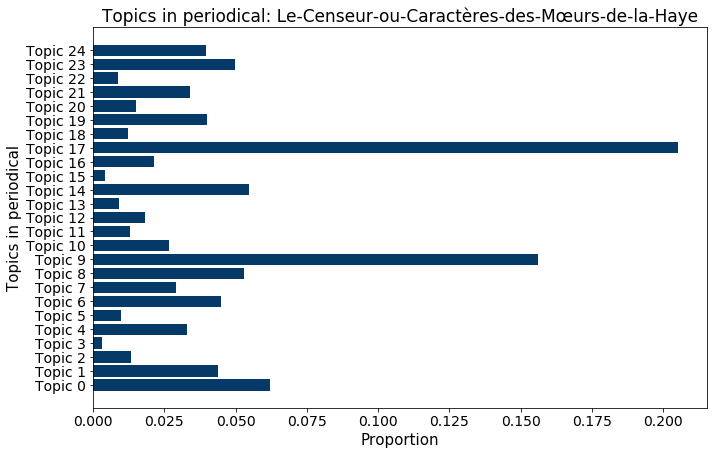

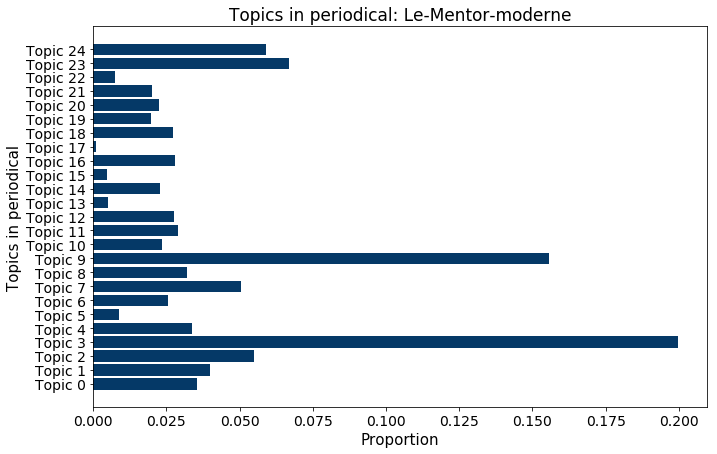

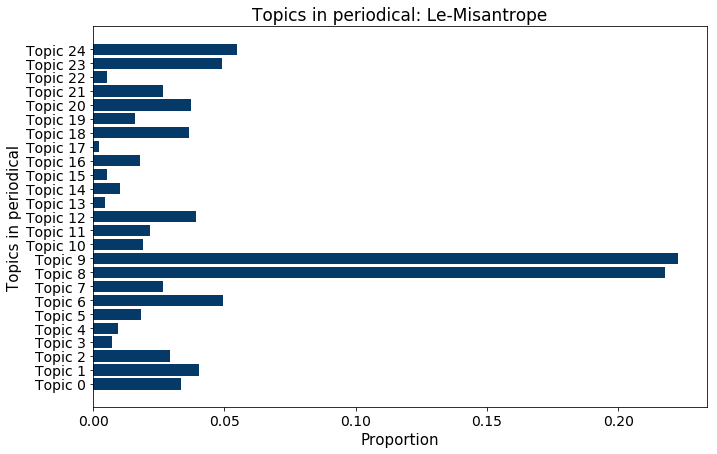

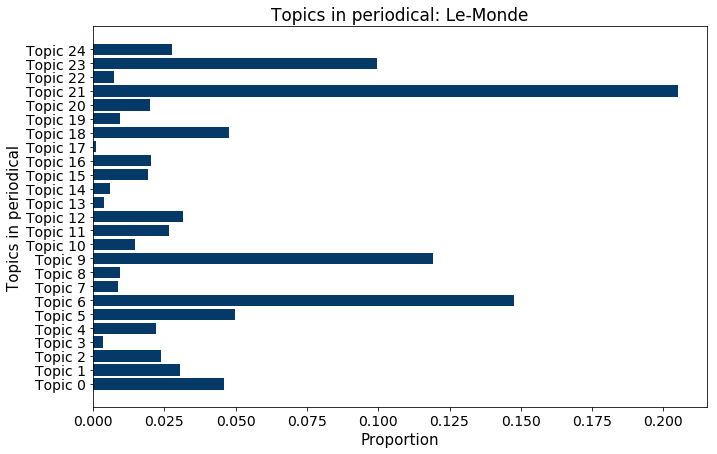

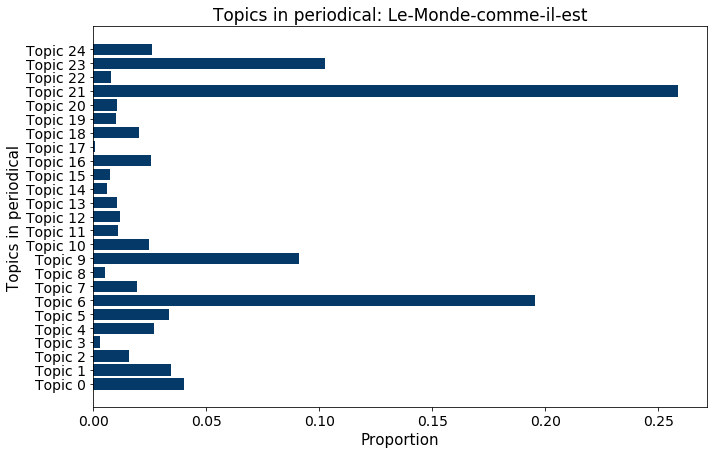

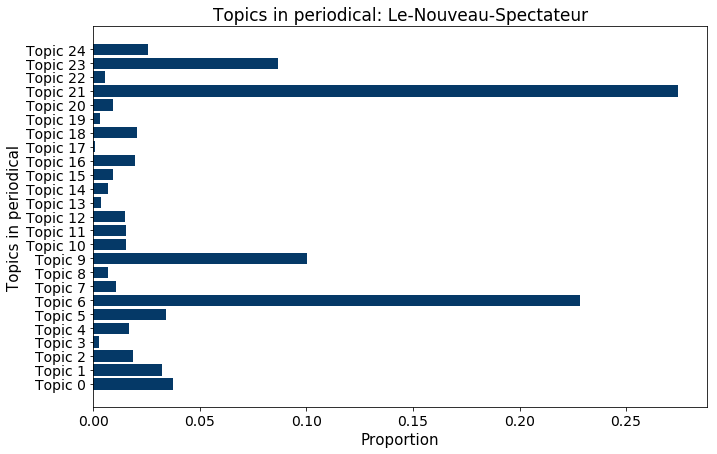

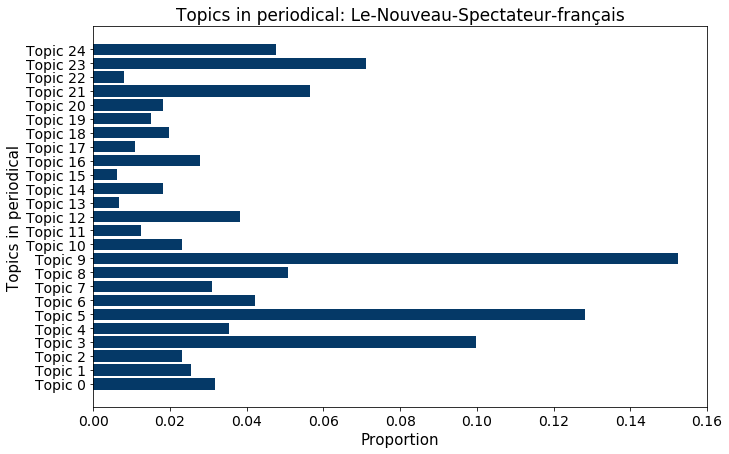

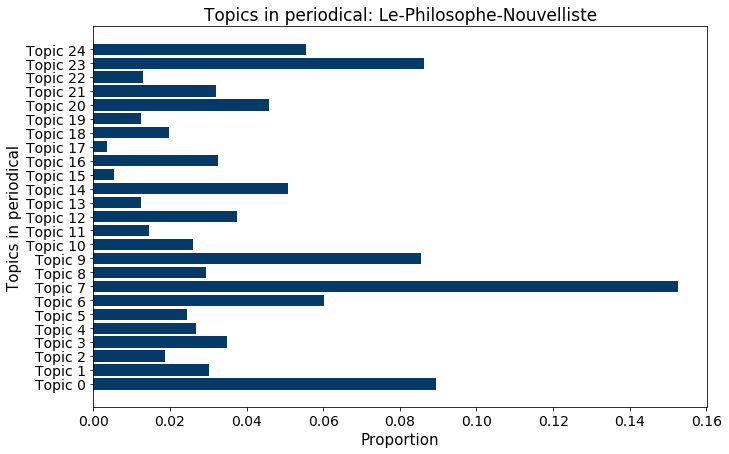

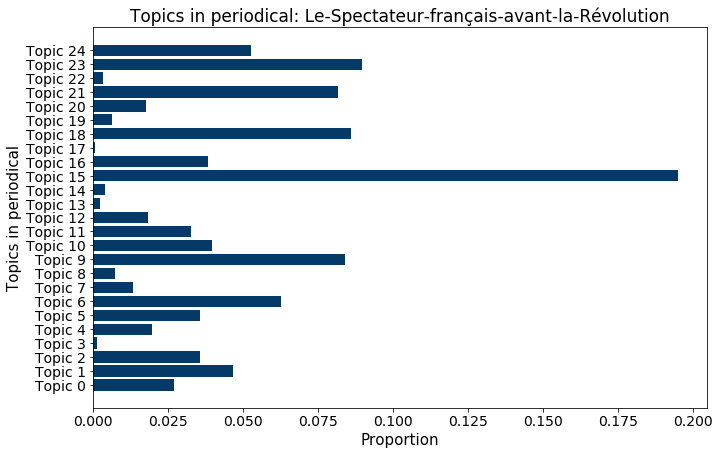

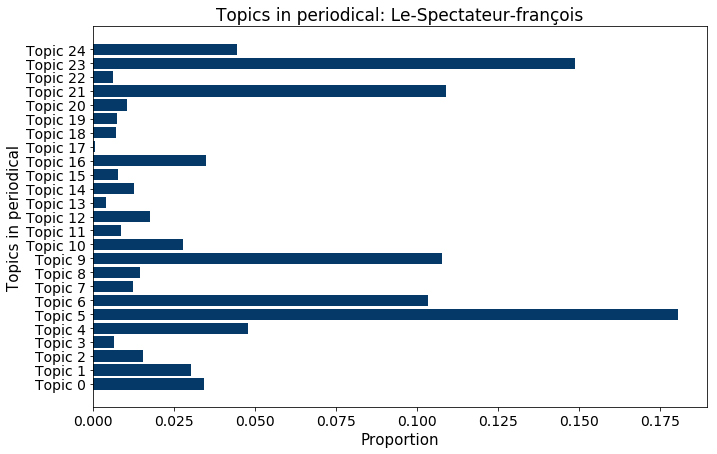

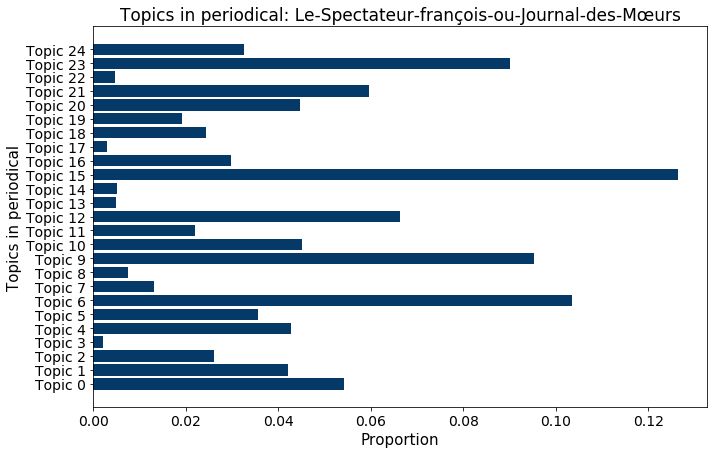

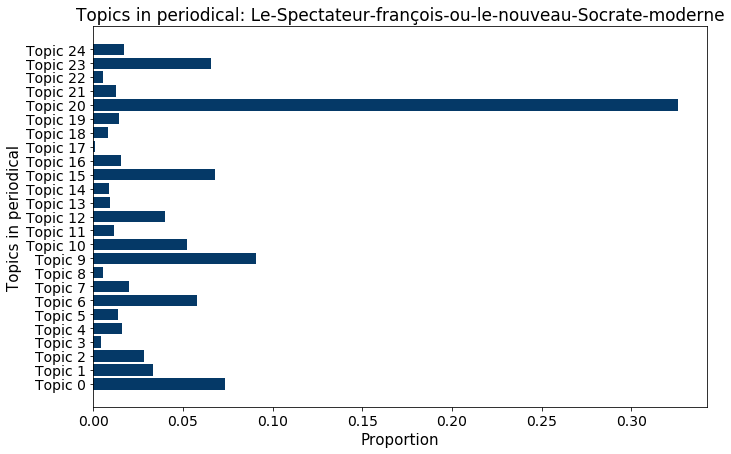

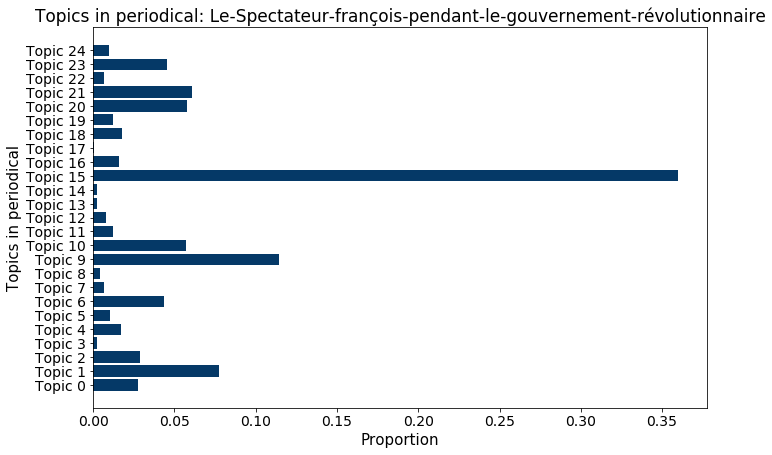

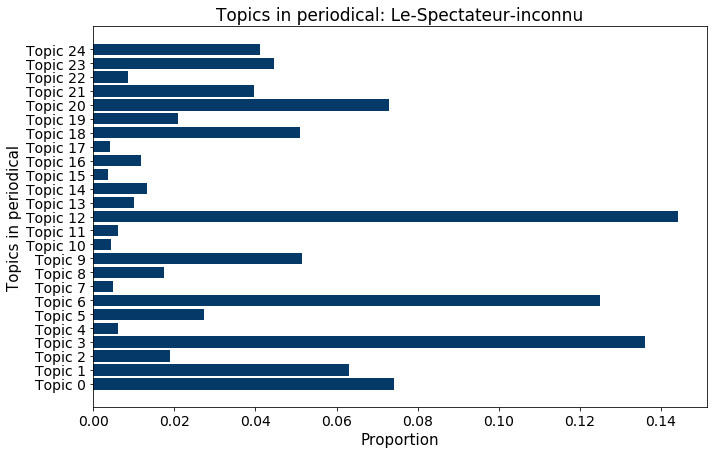

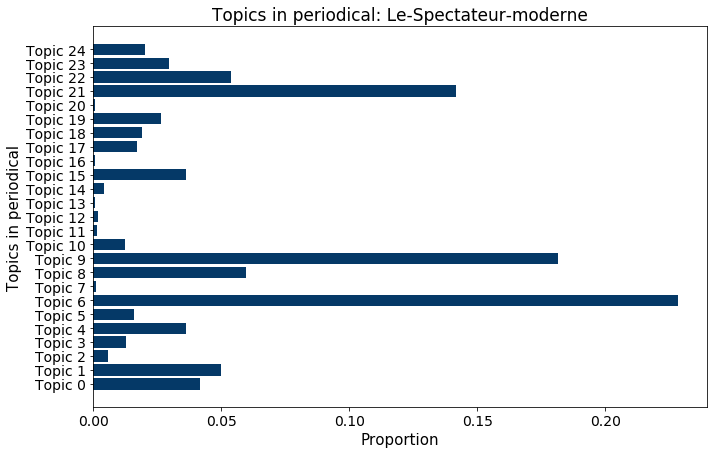

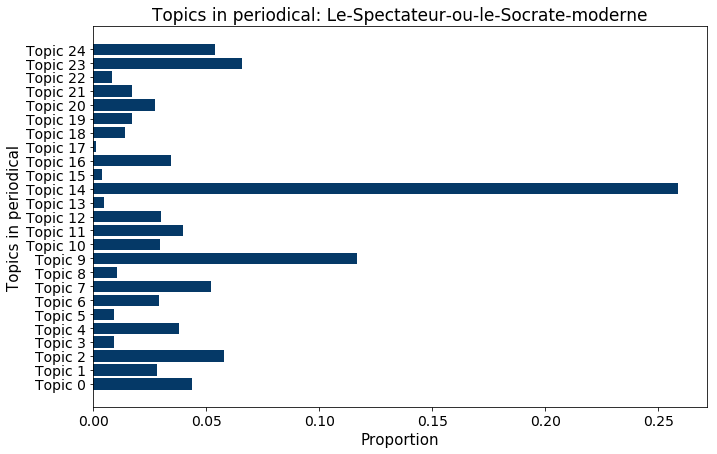

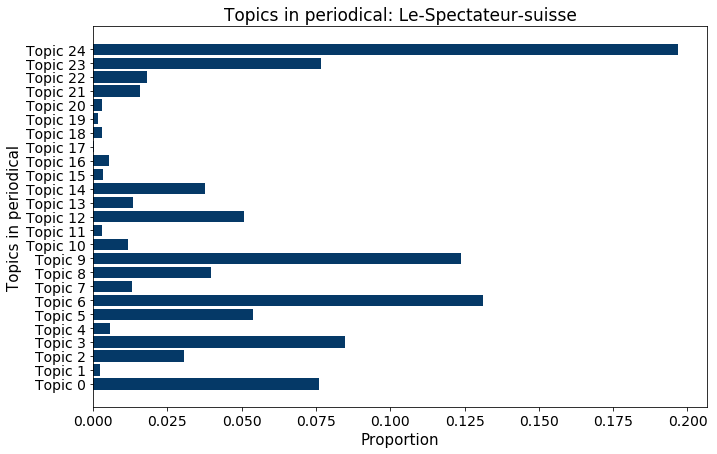

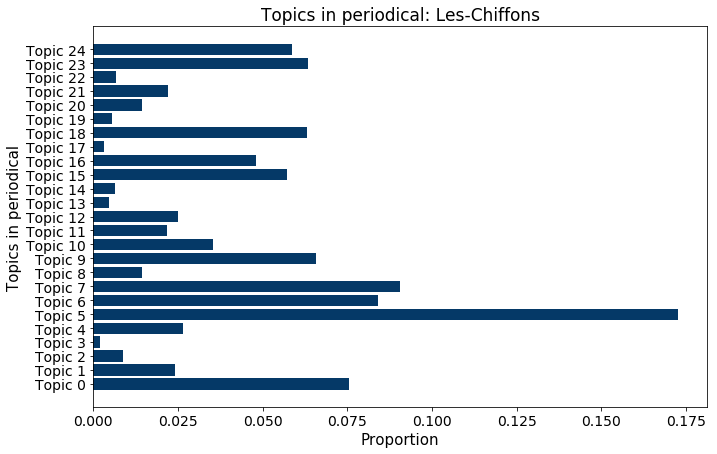

In [26]:
length = len(periodicals_unique)
for n in range(0,length):
    index = str(n)
    static_barchart_per_document = PlotDocumentTopics.static_barchart_per_document(index=n,
                                                                               describer='Topics in periodical',
                                                                               )
    static_barchart_per_document.savefig(bokeh_output + "topic_periodical_" + str(index) + ".png", format='png', frameon=True, bbox_inches='tight')


You can also visualize the distribution of a specific topic in all periodicals:

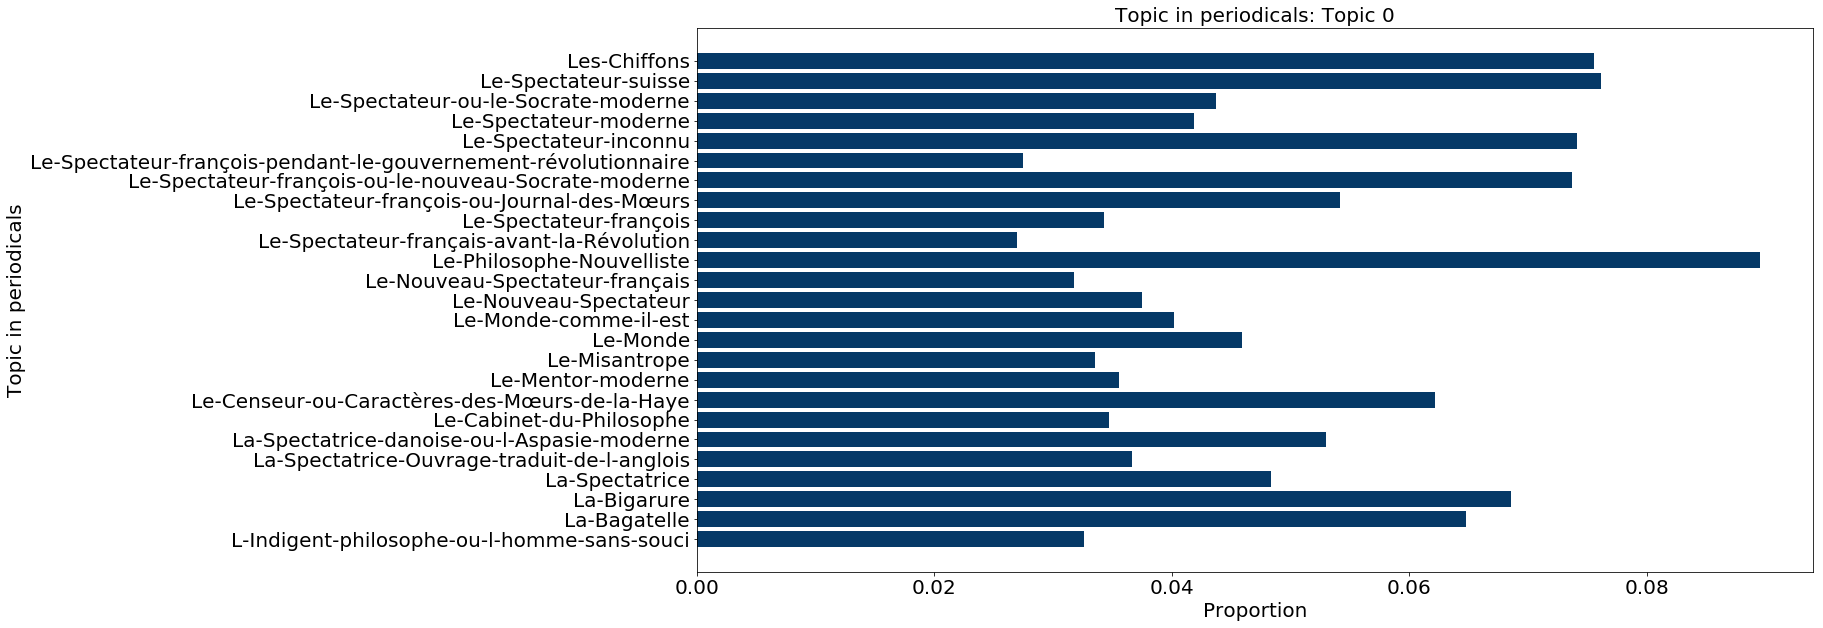

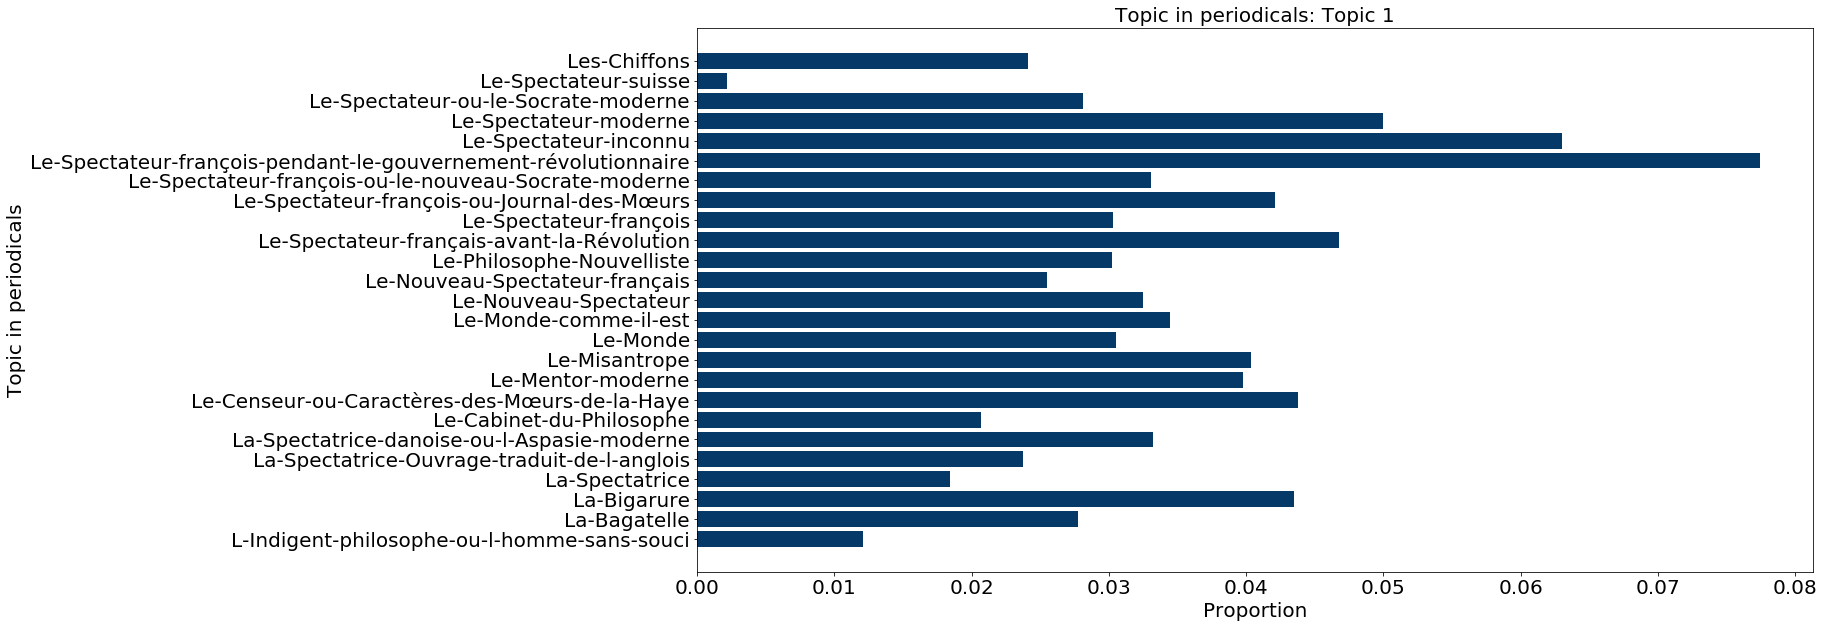

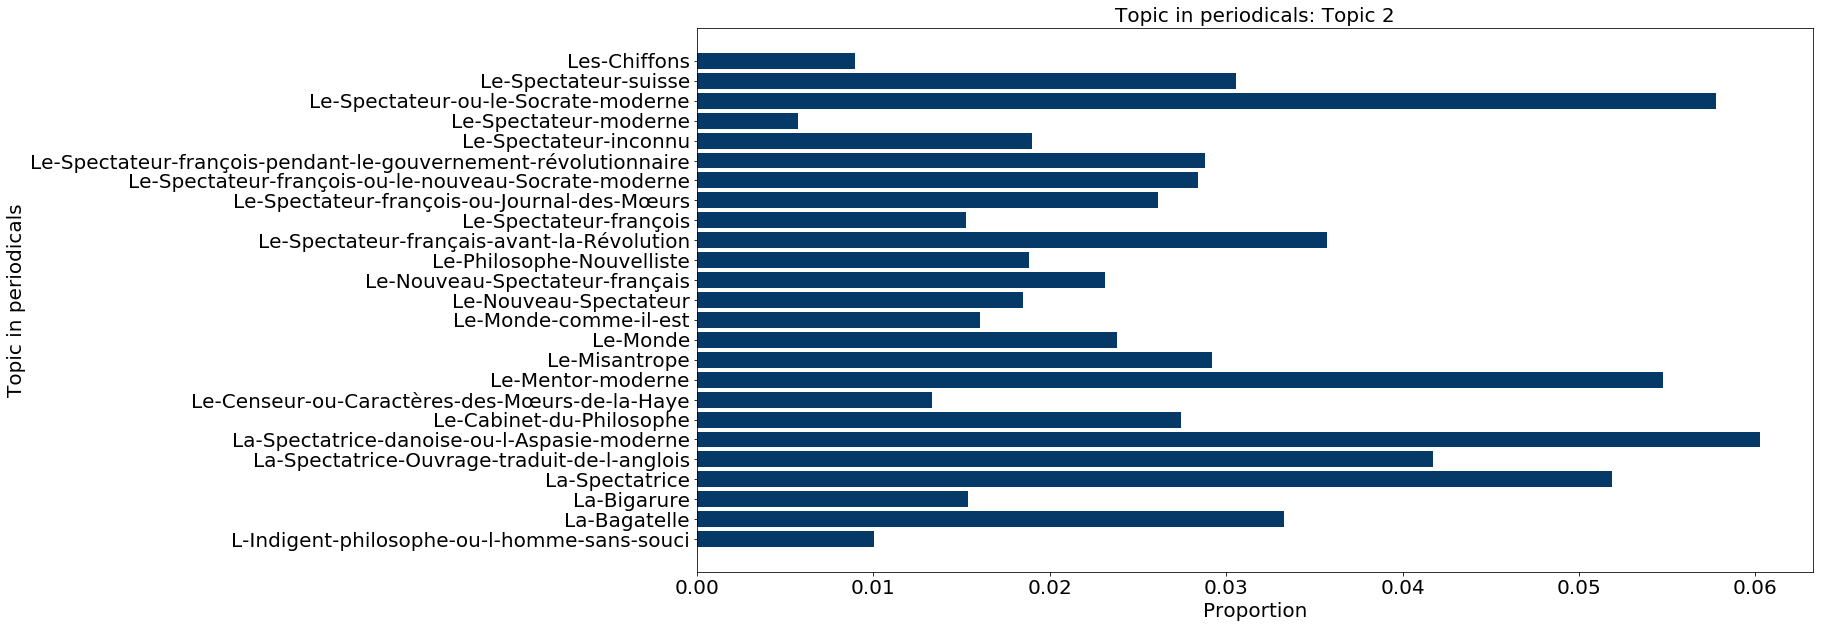

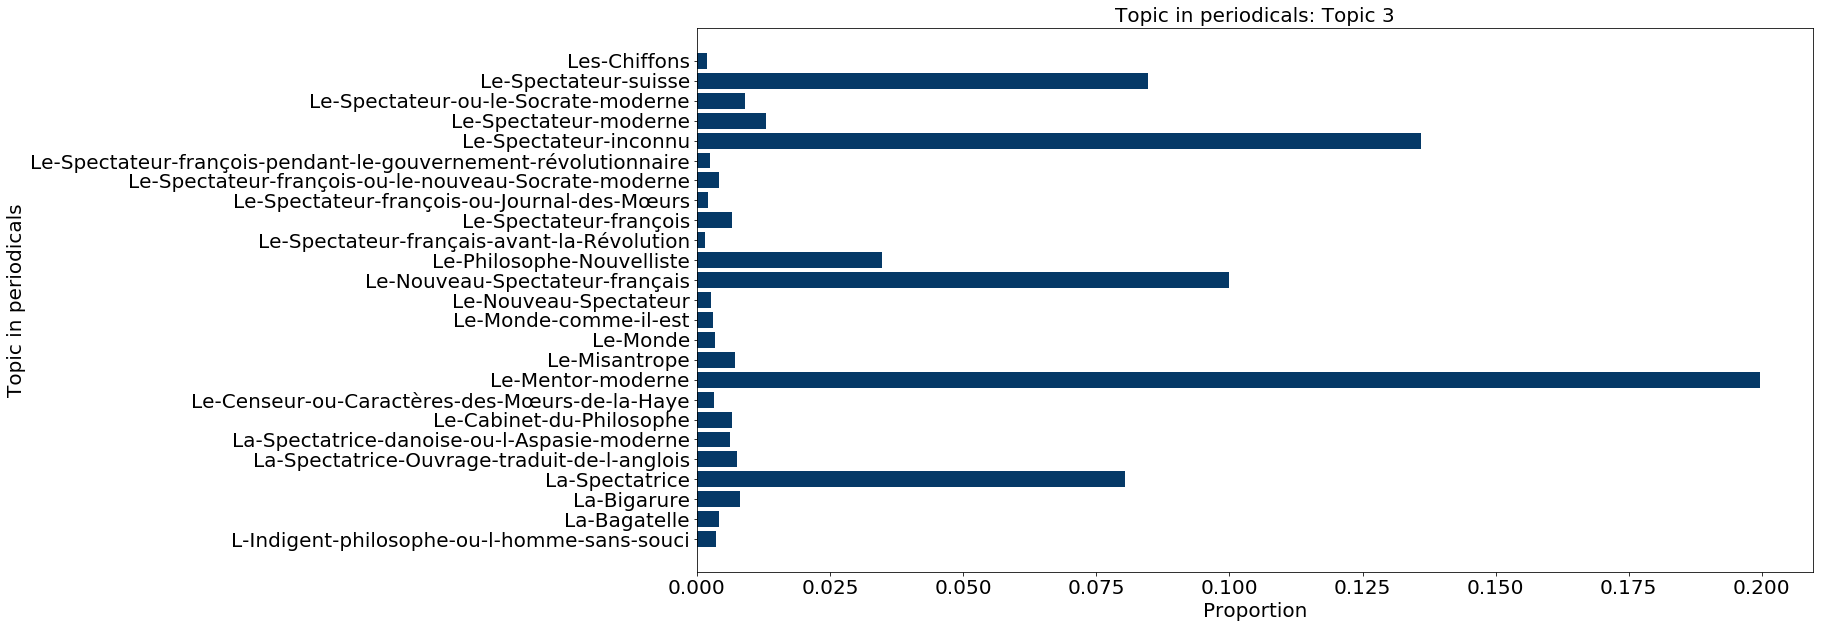

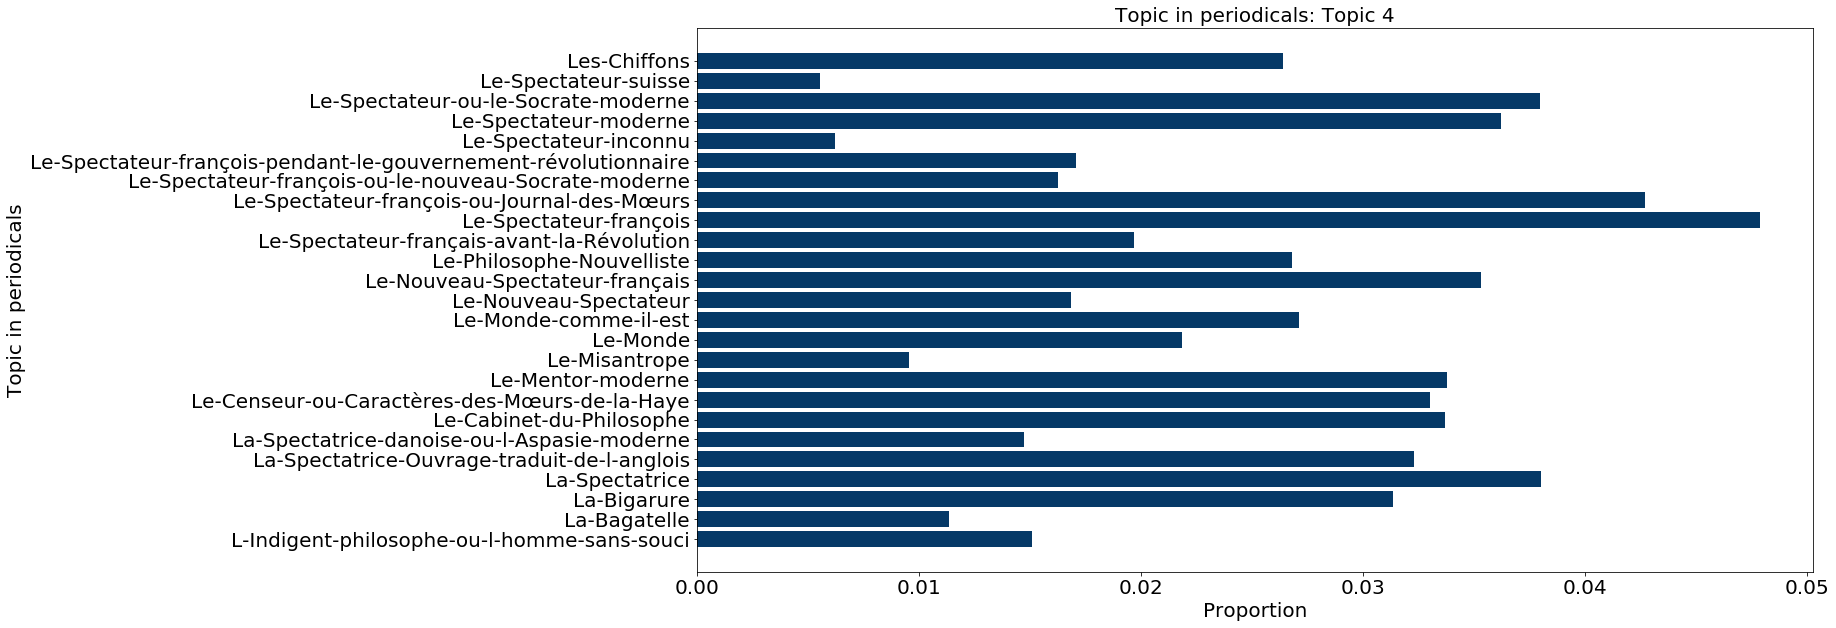

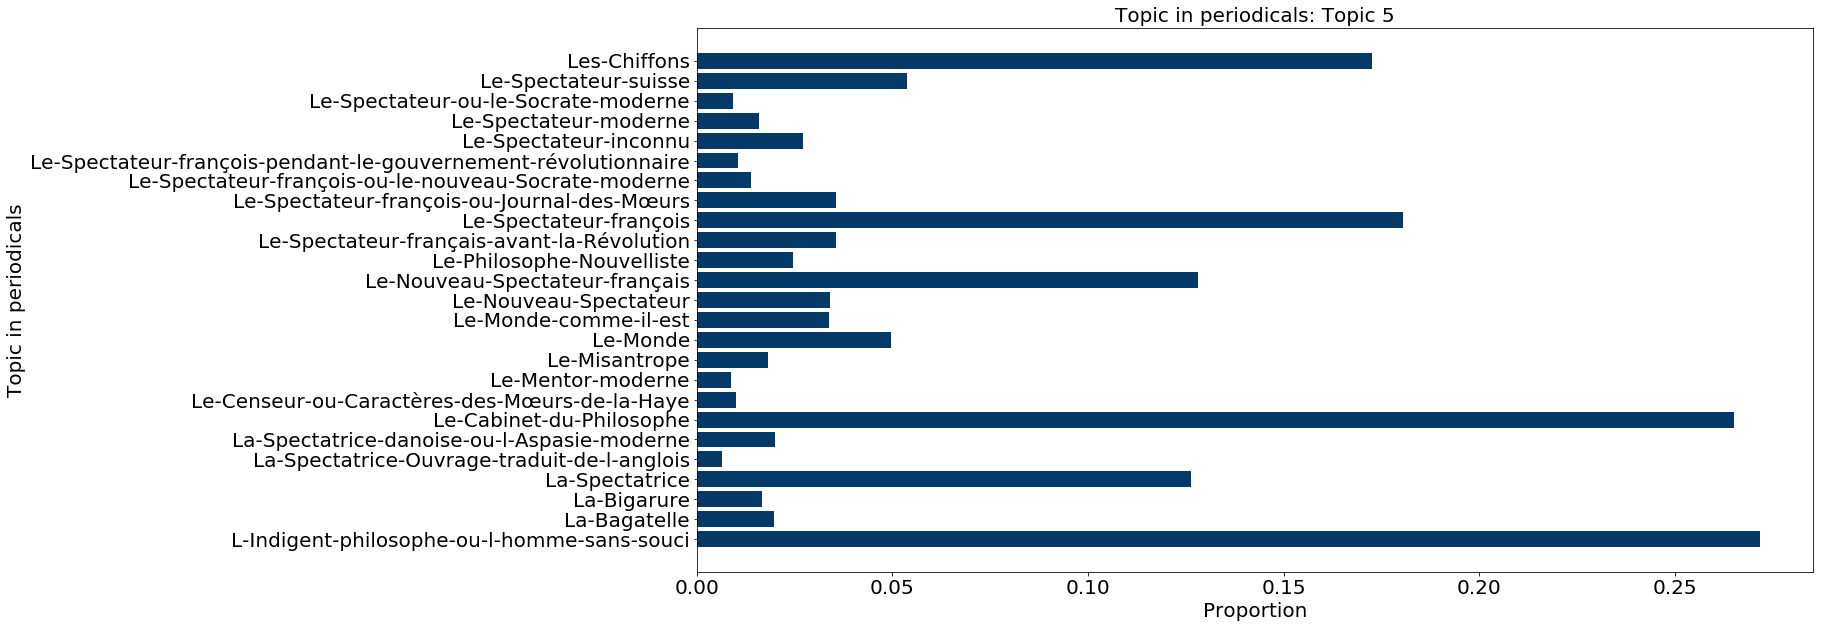

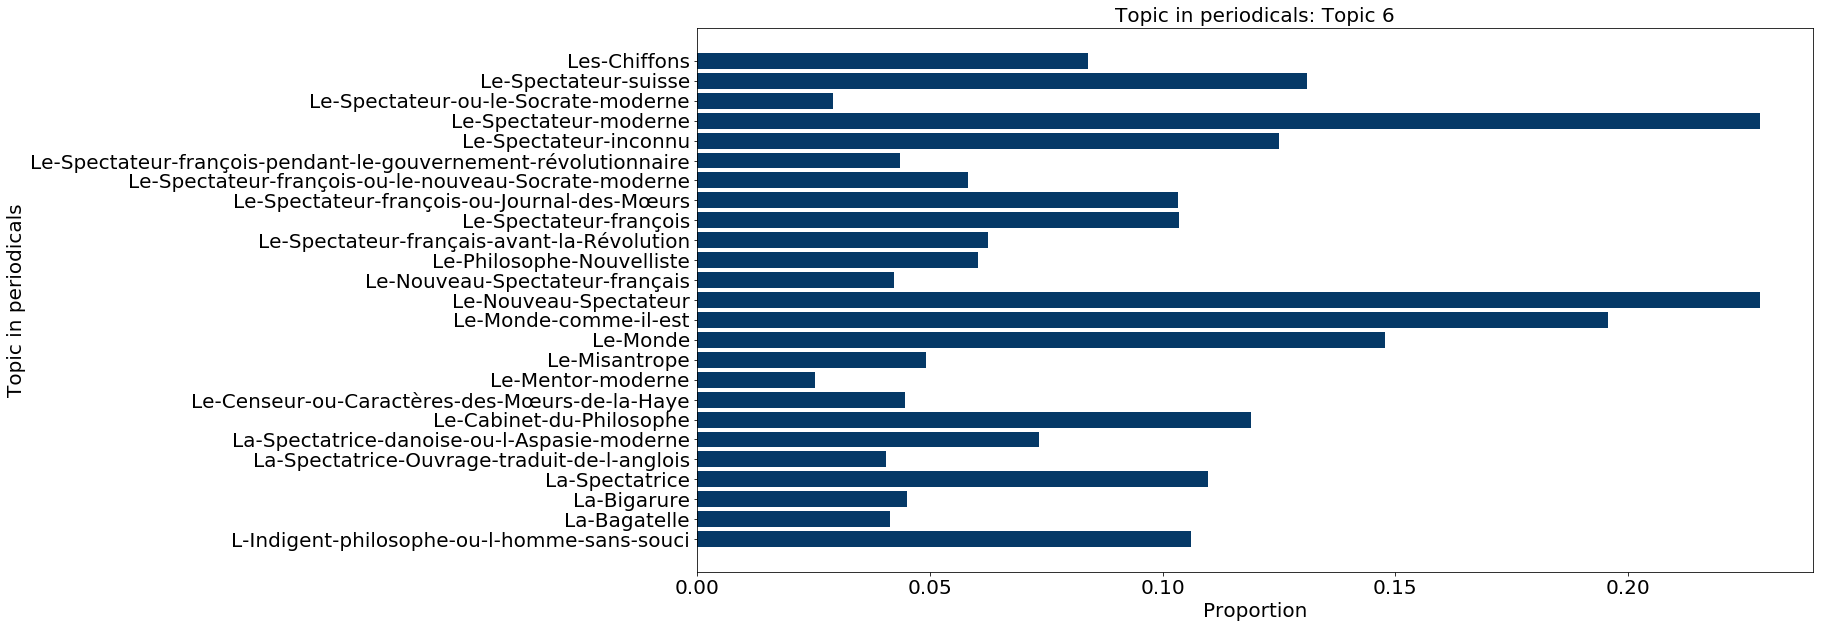

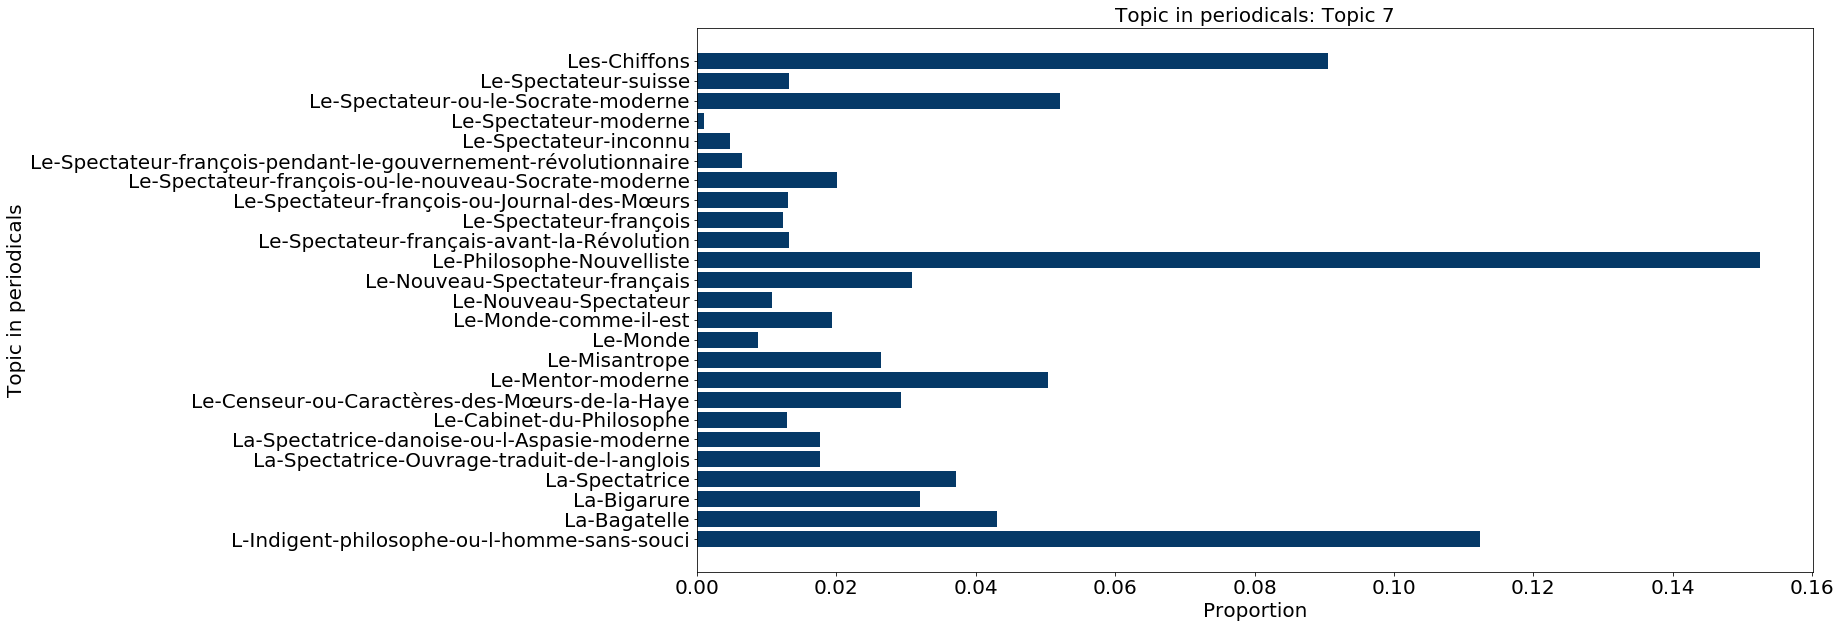

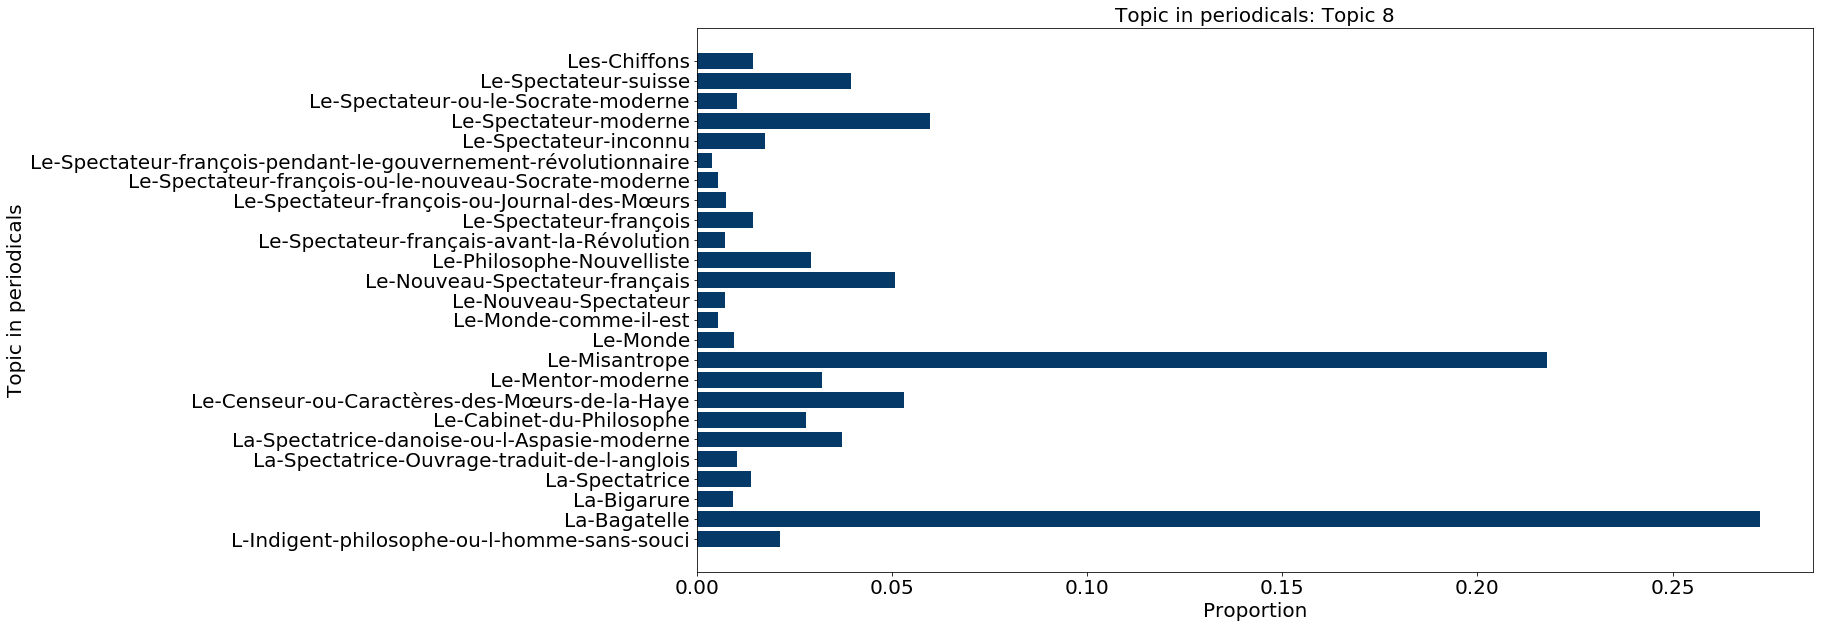

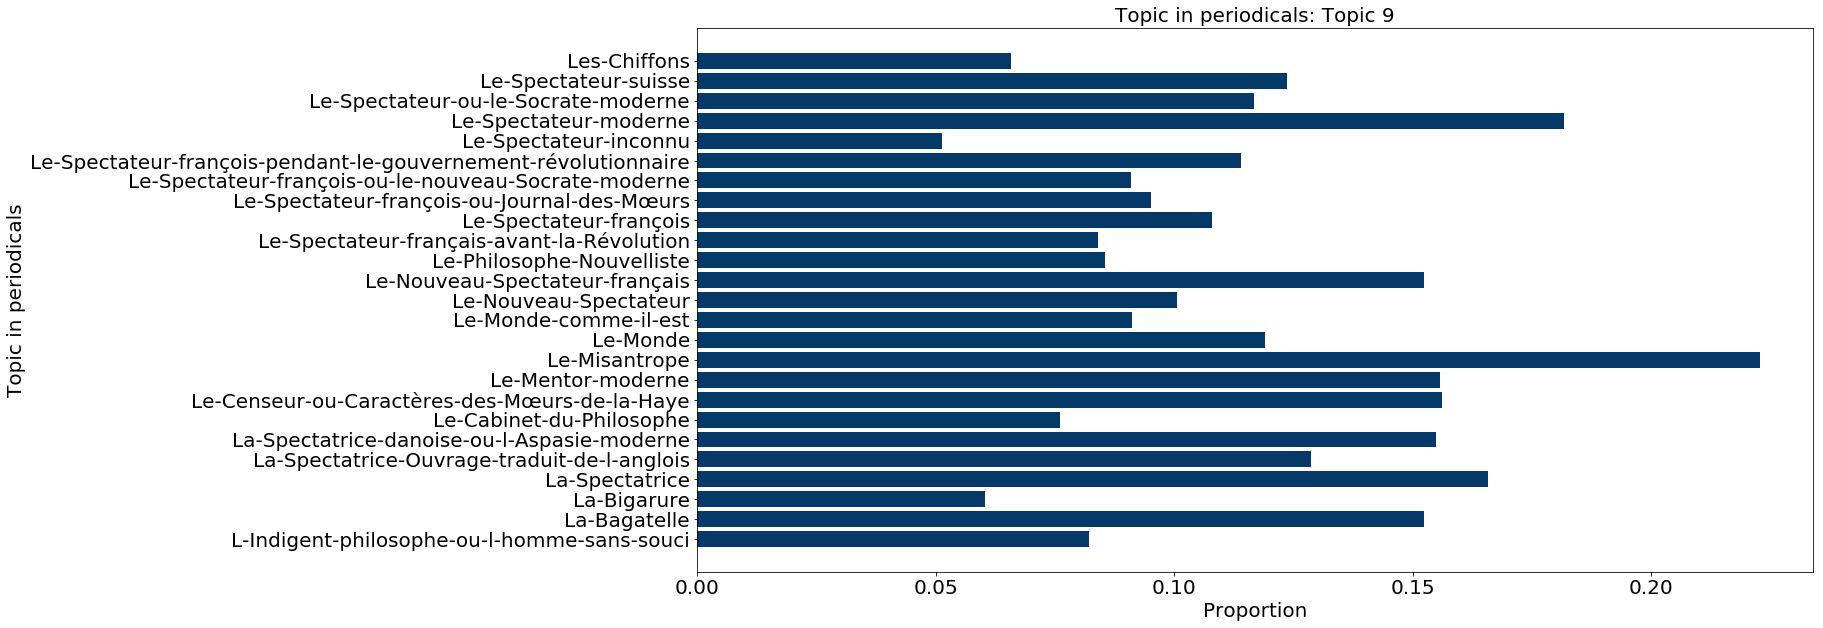

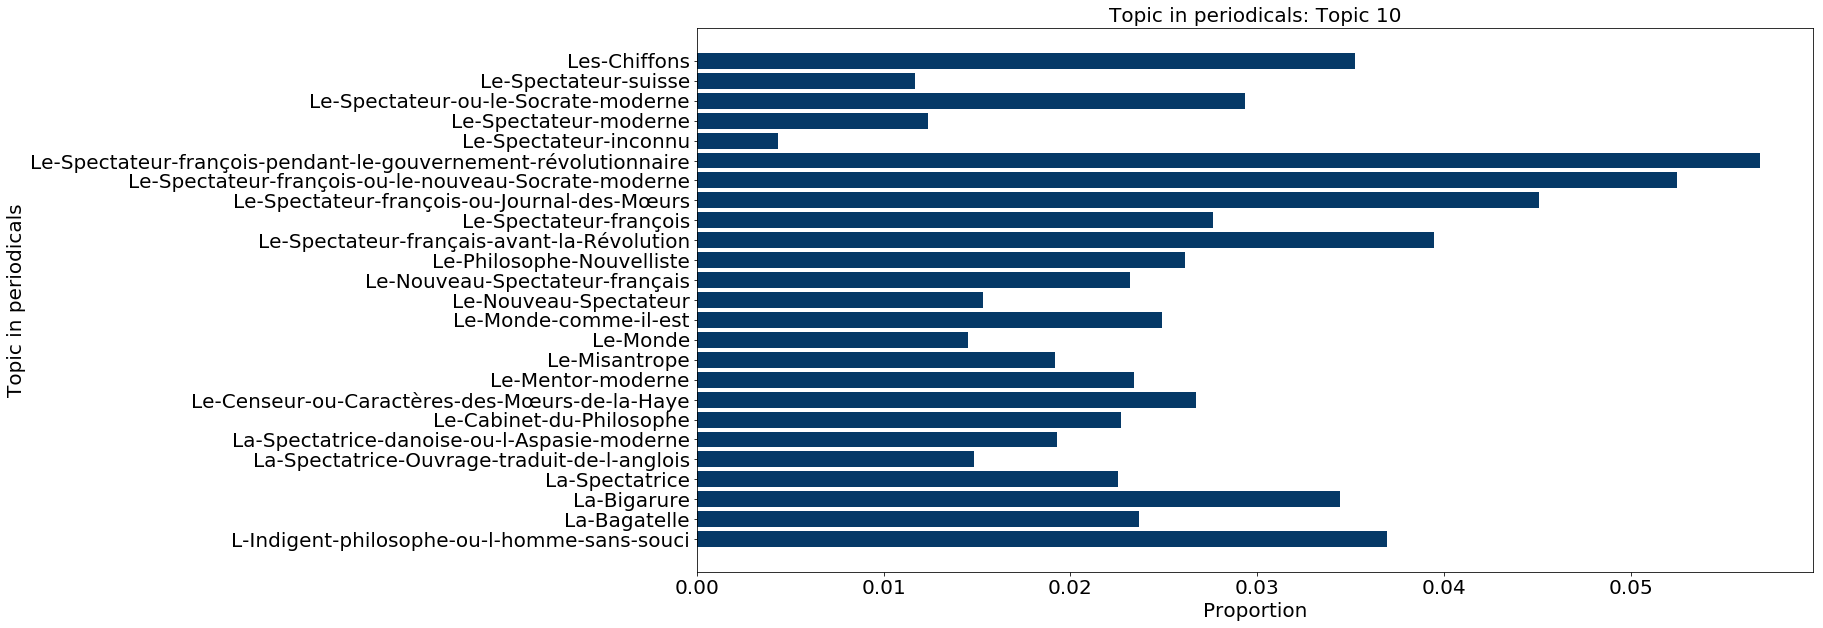

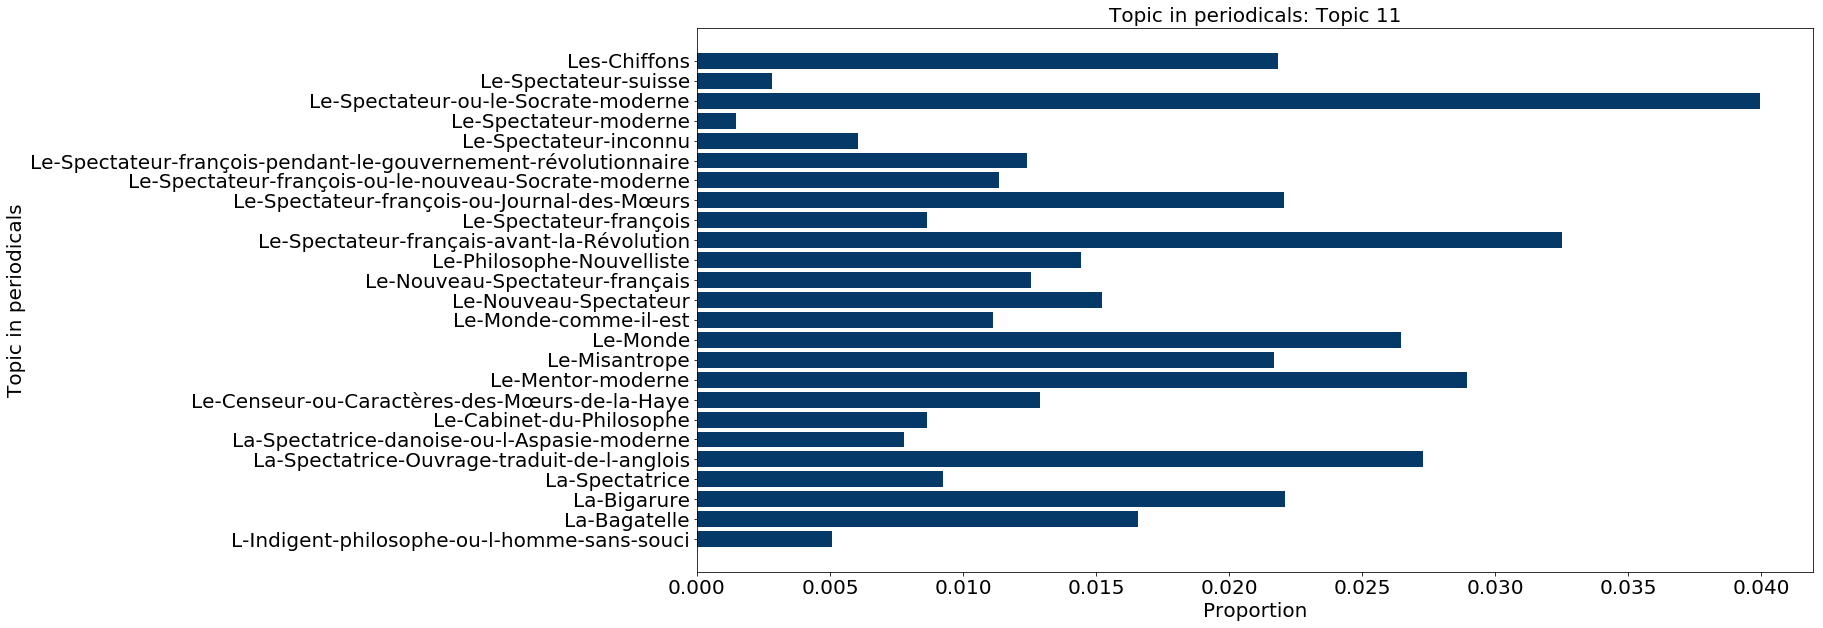

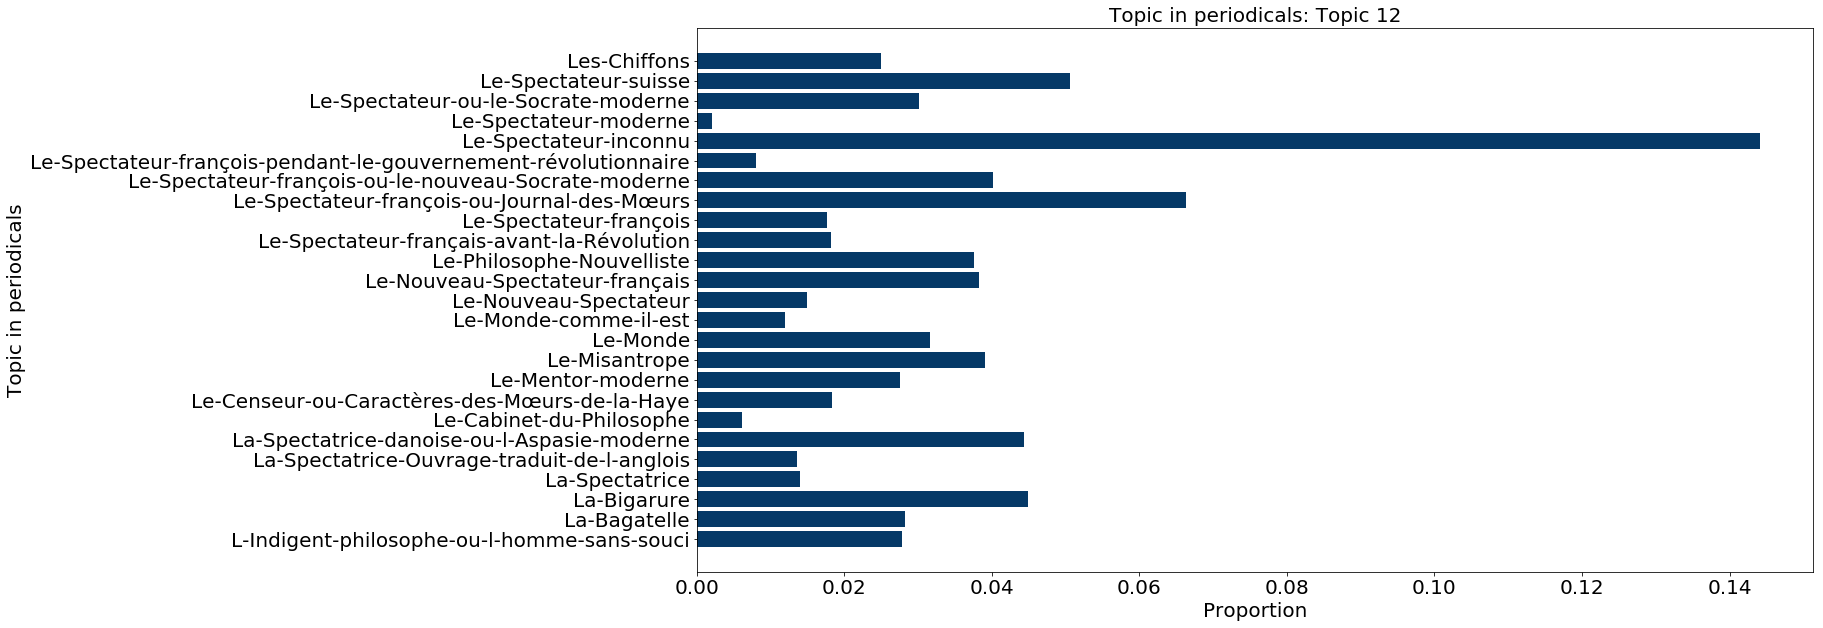

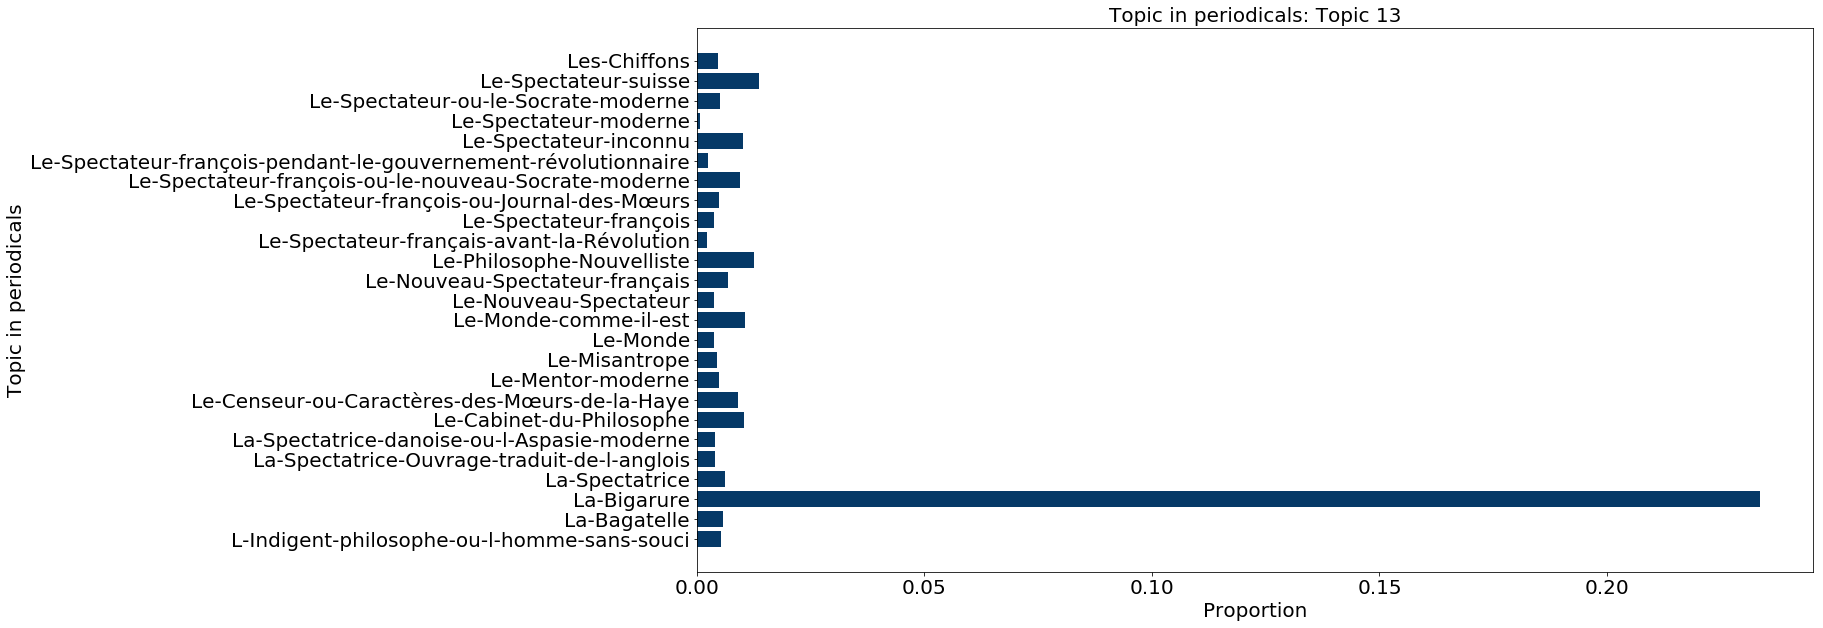

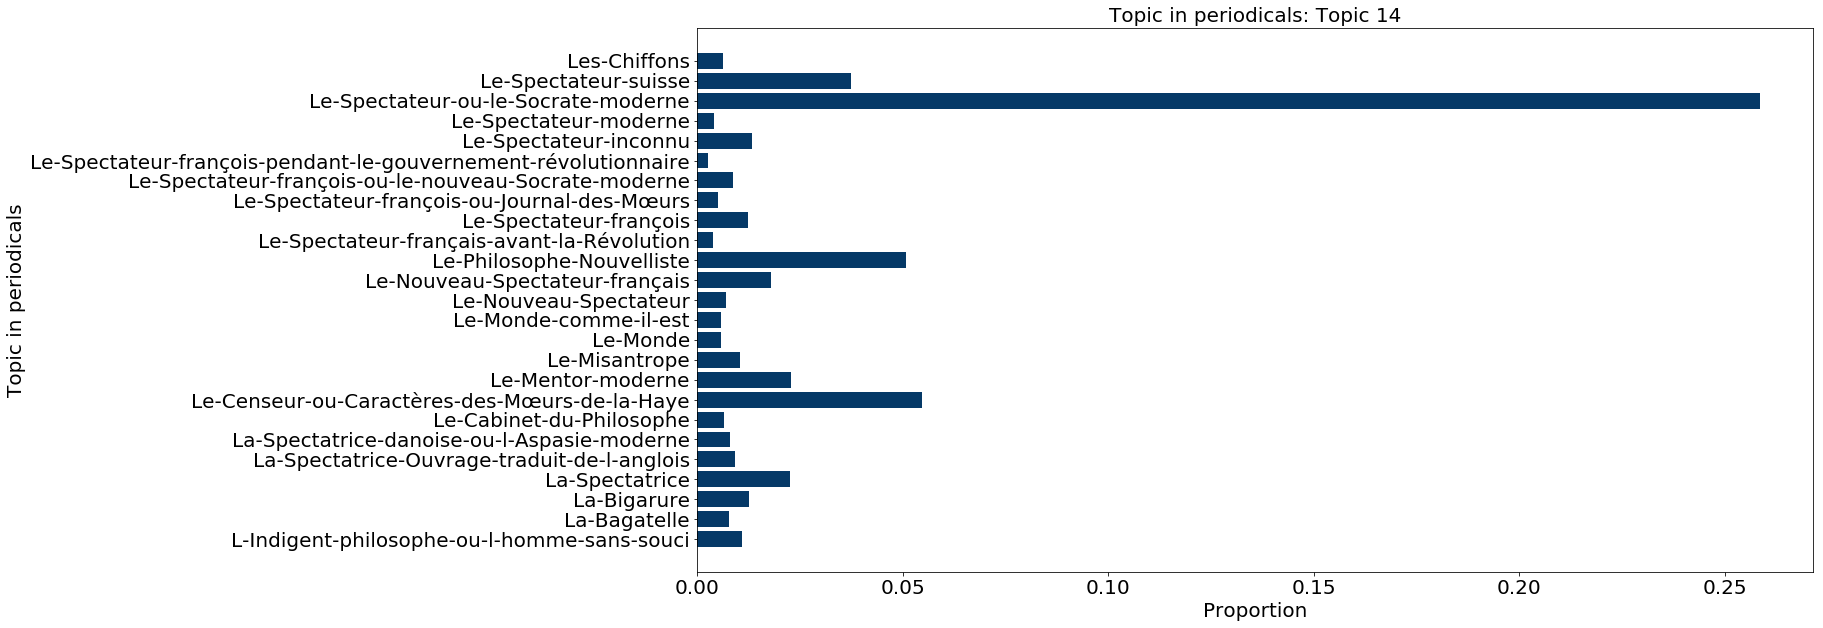

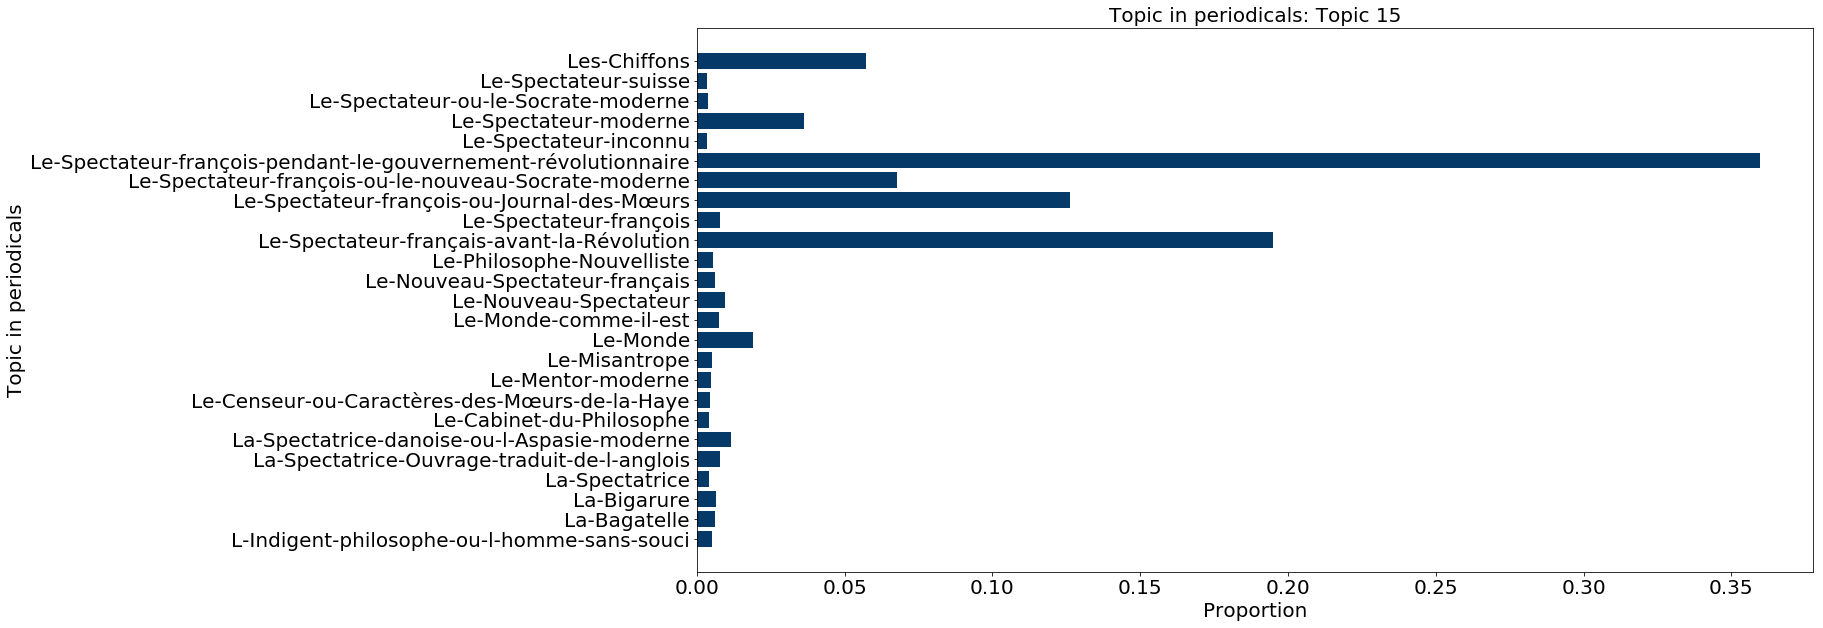

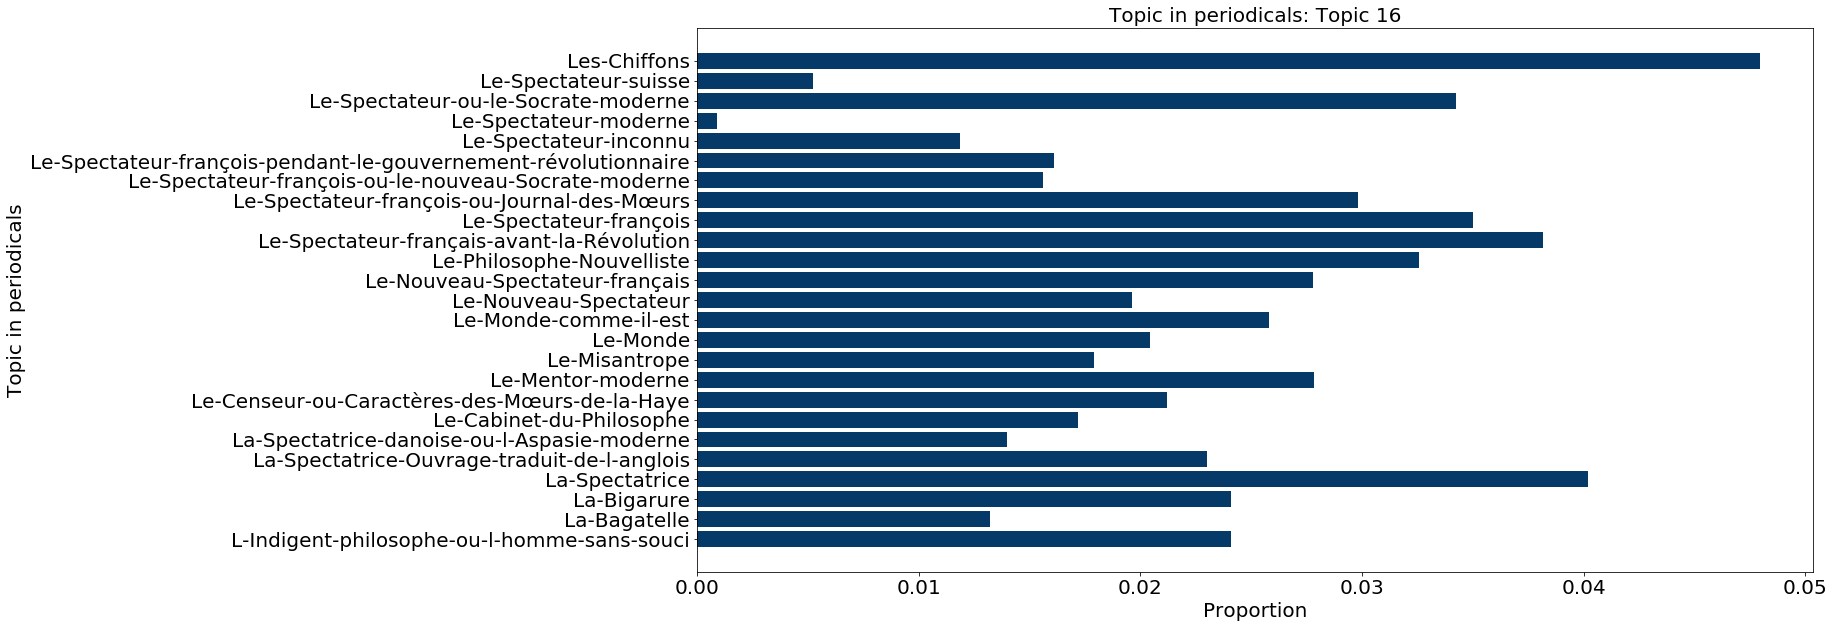

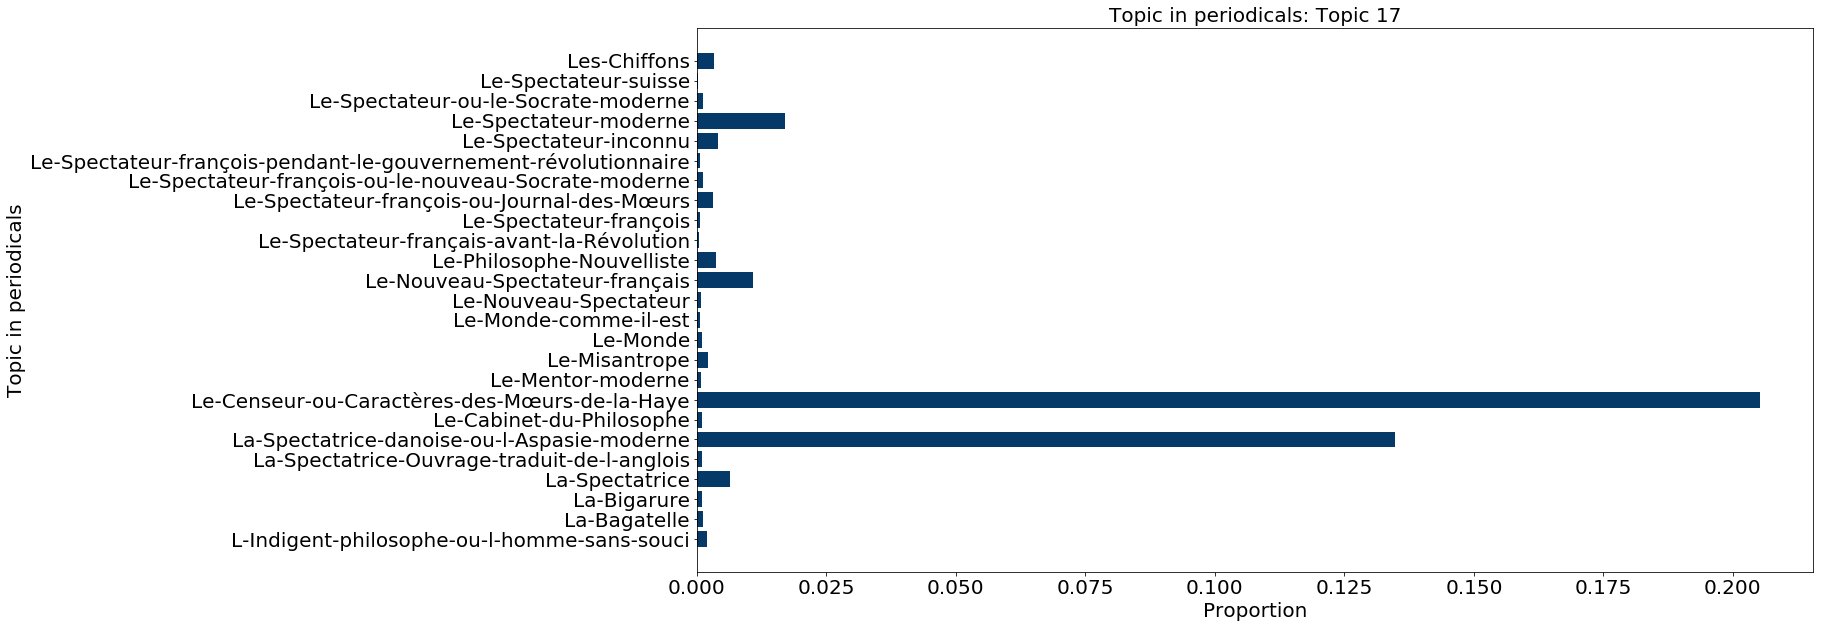

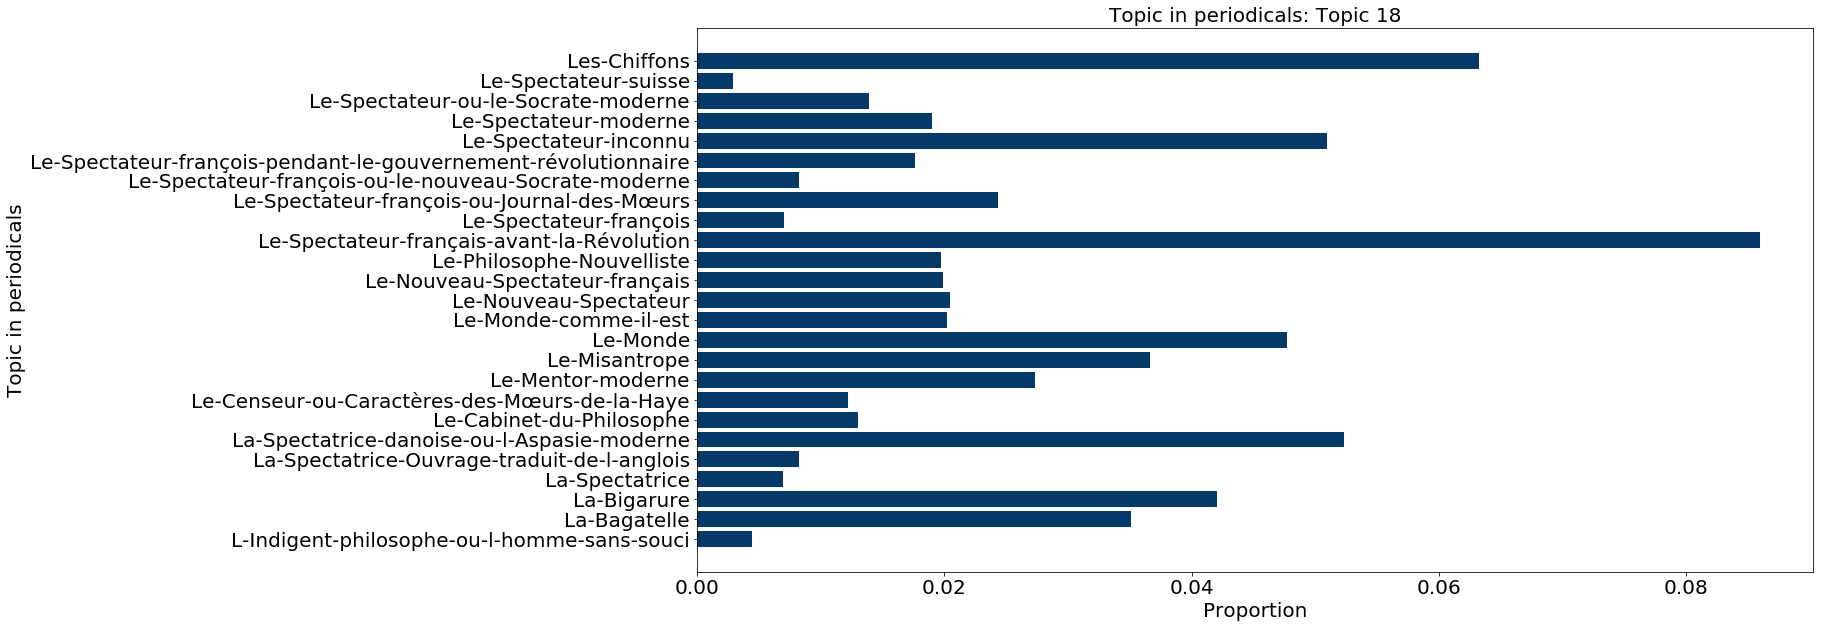

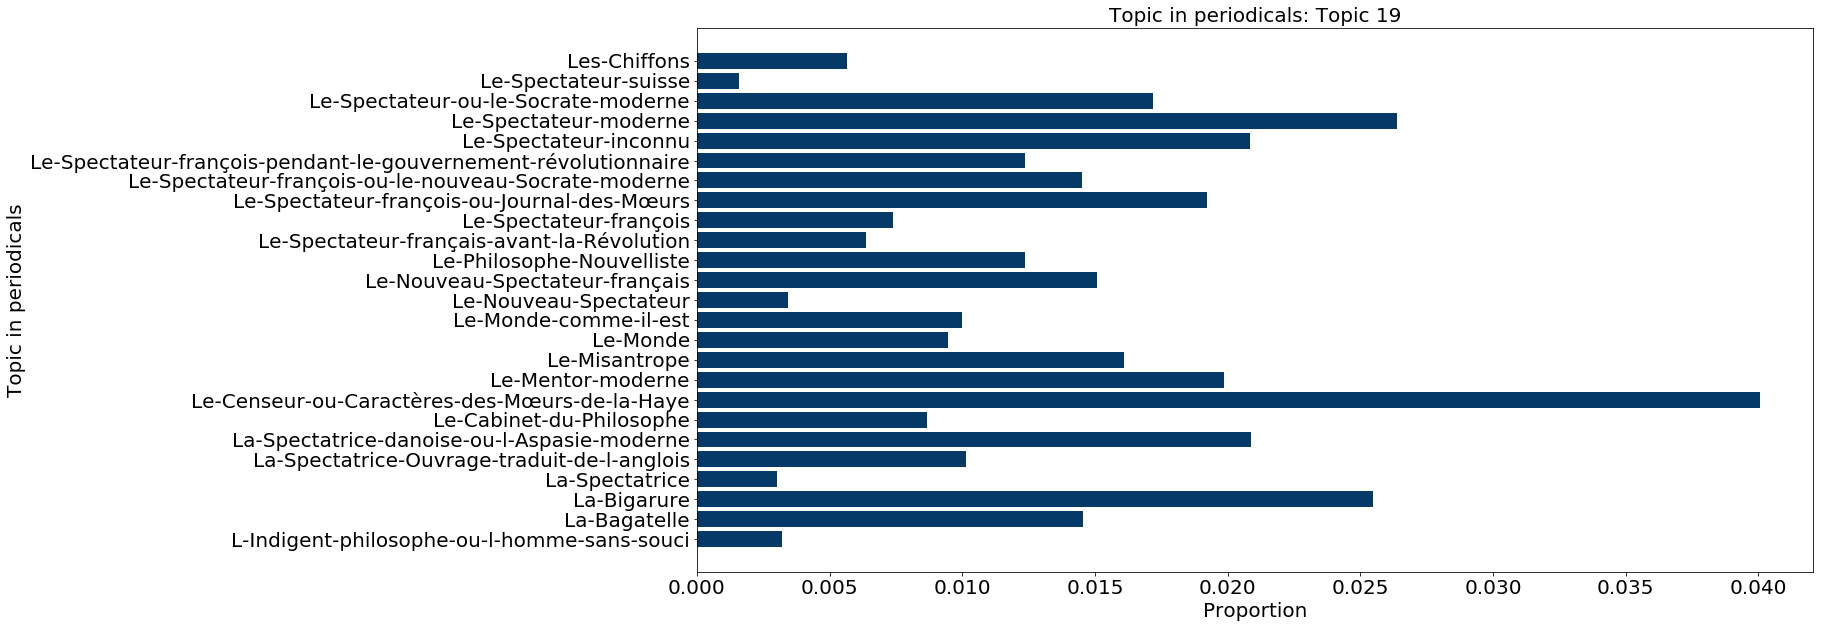

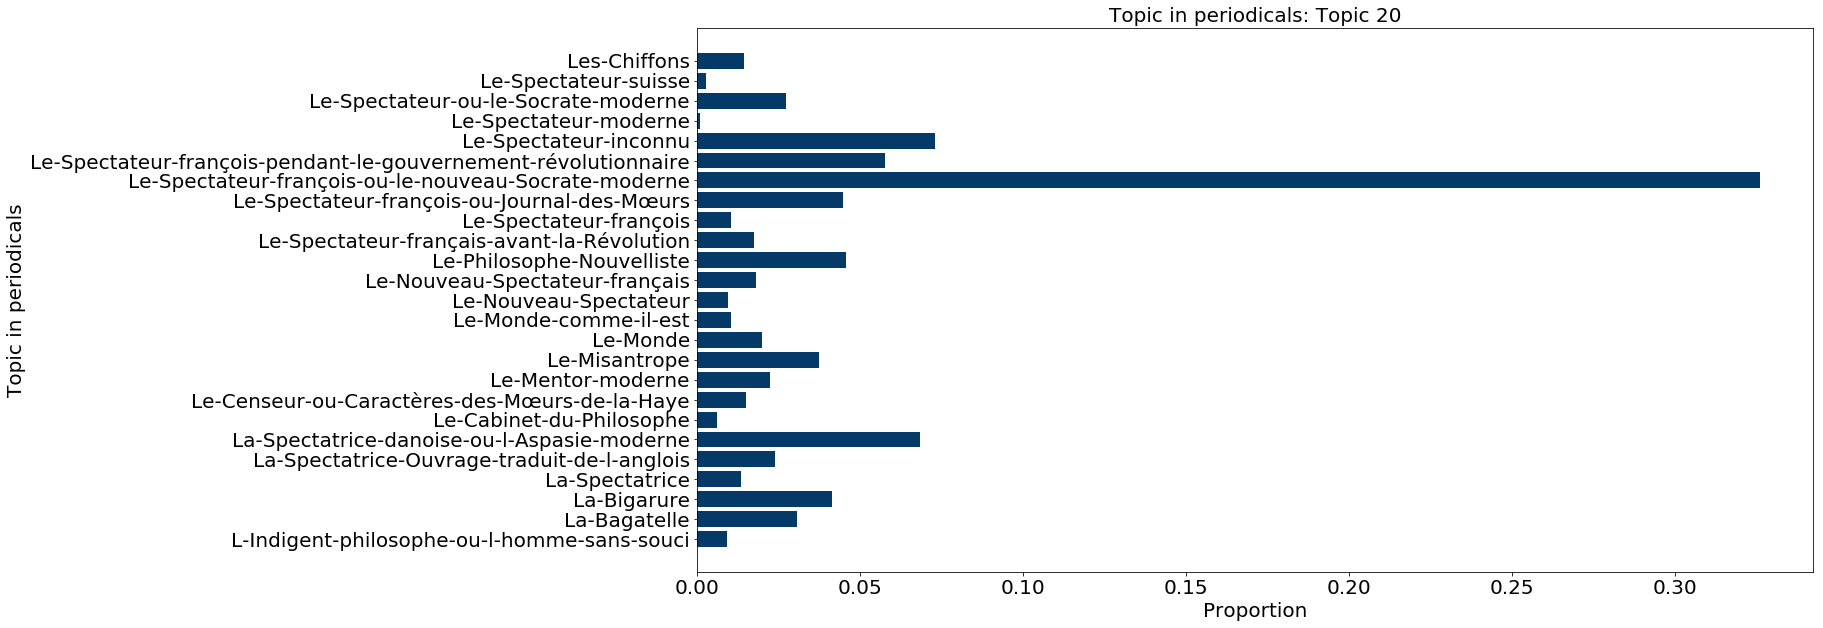

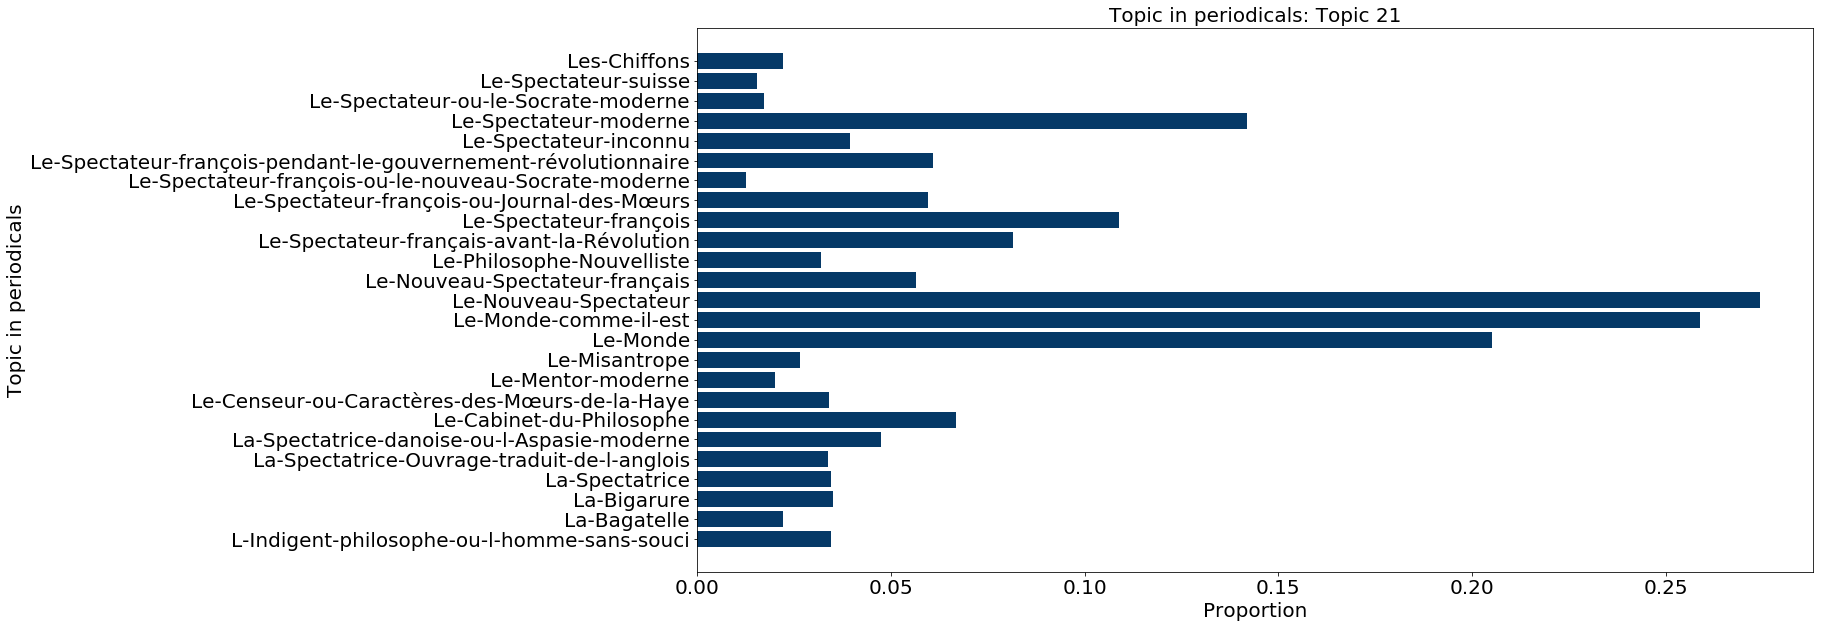

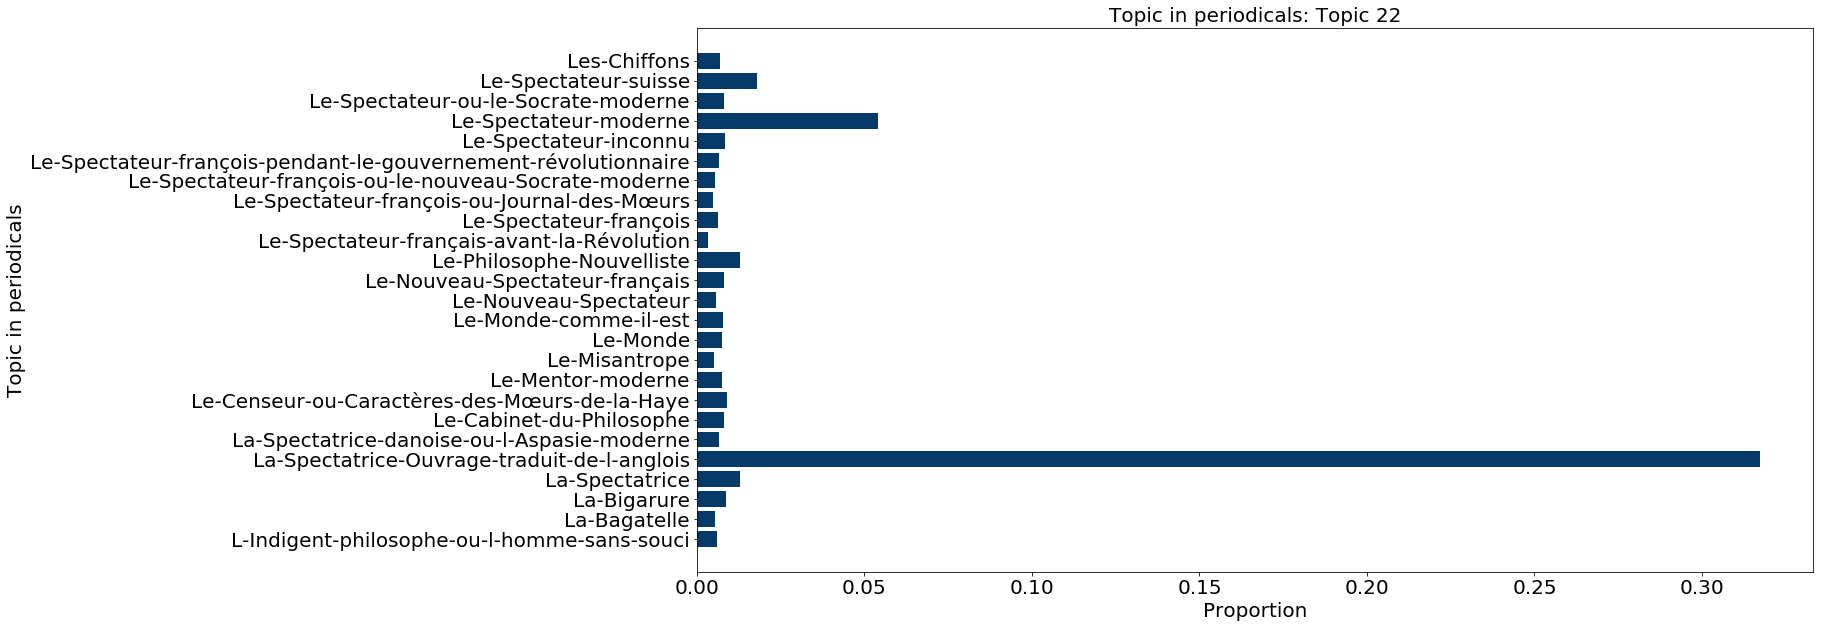

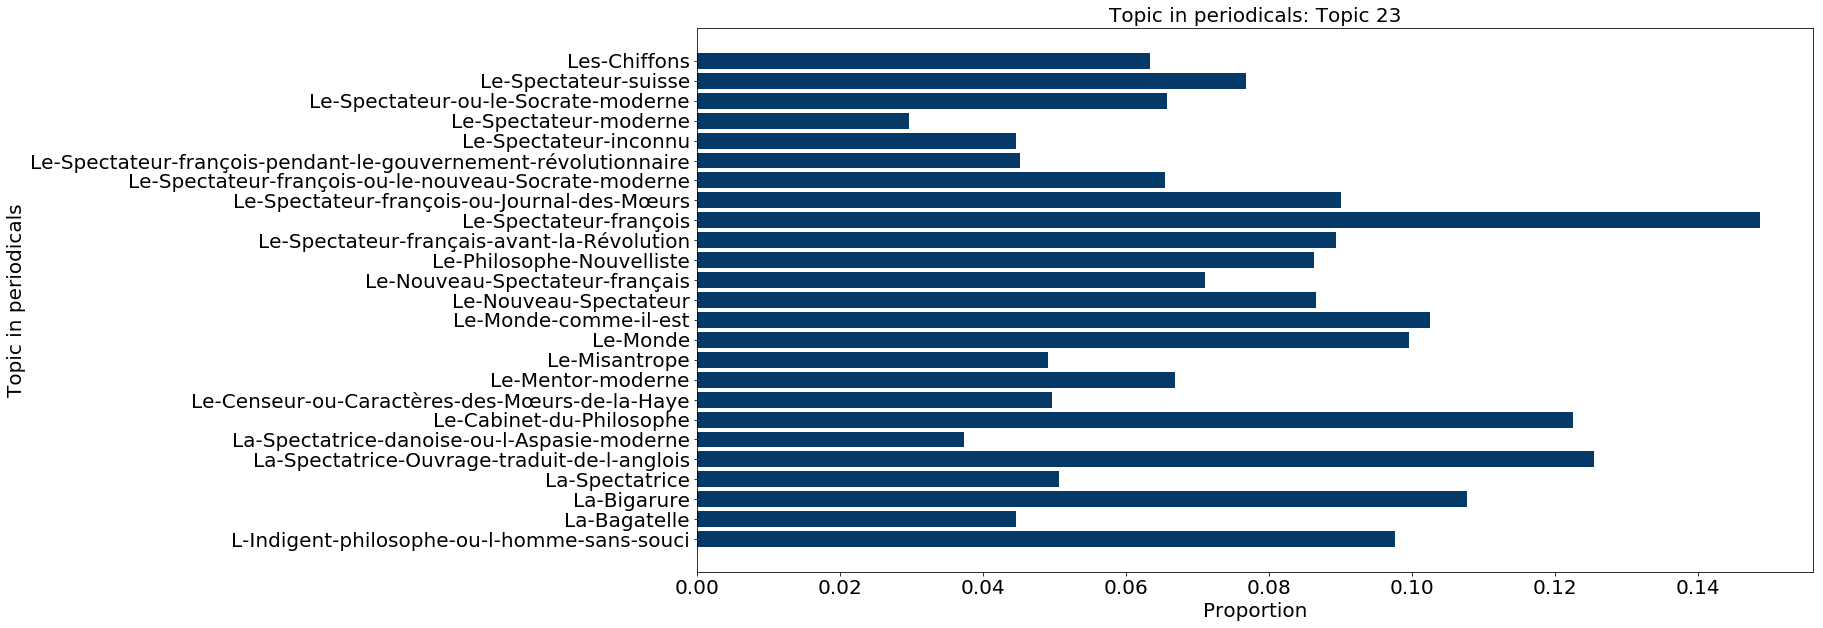

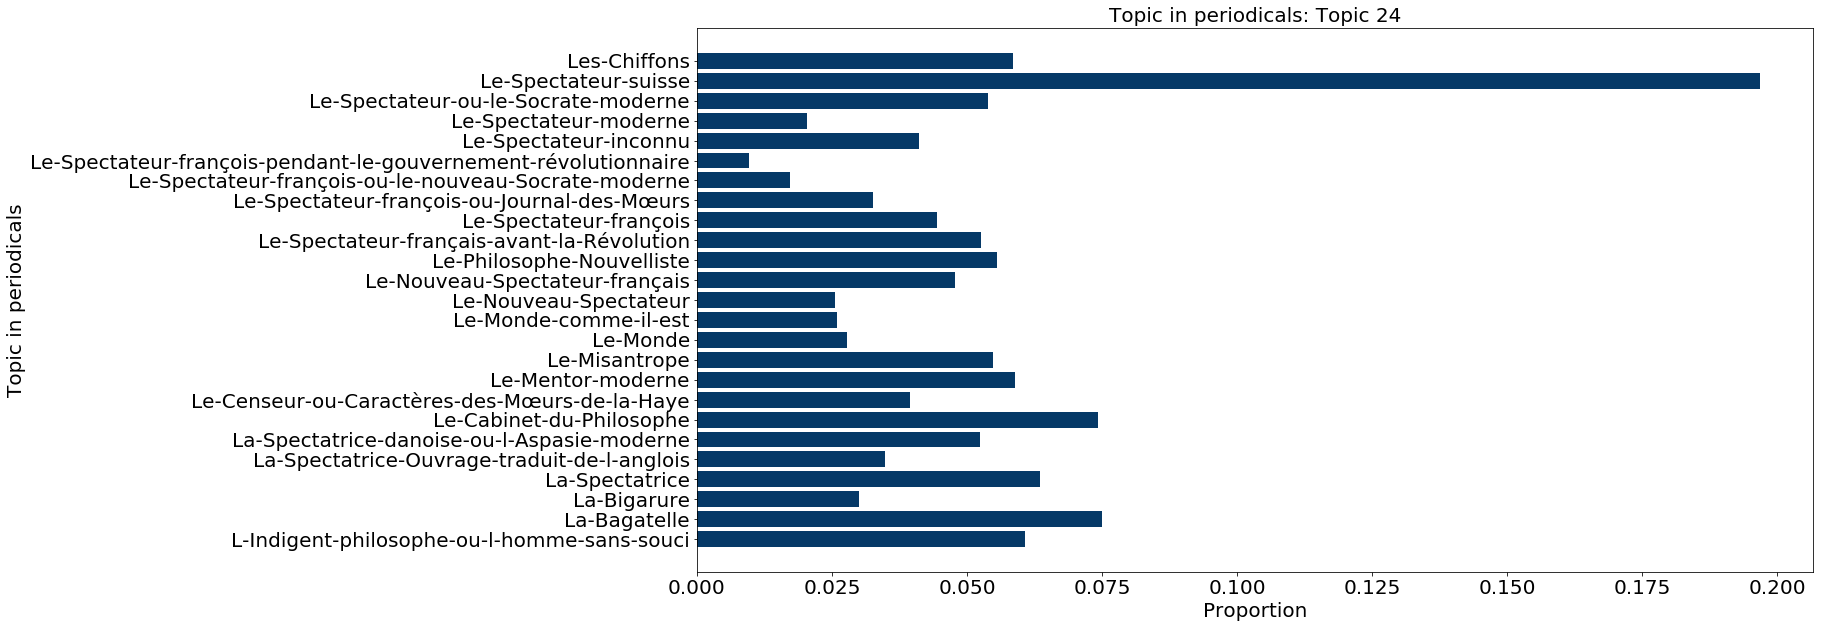

In [27]:
for n in range(0,len(topics)):
    index = str(n)
    static_barchart_per_topic = PlotDocumentTopics.static_barchart_per_topic(index=n, describer='Topic in periodicals', figsize=(20,10), labels_fontsize='20', ticks_fontsize='20', title_fontsize='20')
    static_barchart_per_topic.savefig(bokeh_output + "topic_" + str(index) + ".png", format='png', frameon=True, bbox_inches='tight')


To check out other options to create or adjust your visalization:

In [28]:
help(PlotDocumentTopics)
#help(static_heatmap)
#help(export_png)

Help on PlotDocumentTopics in module dariah_topics.visualization object:

class PlotDocumentTopics(builtins.object)
 |  PlotDocumentTopics(document_topics)
 |  
 |  Class to visualize document-topic matrix.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, document_topics)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  interactive_barchart_per_document(self, **kwargs)
 |      Plots an interactive barchart per document.
 |      
 |      Args:
 |          index Union(int, str): Index of document-topics matrix column or
 |              name of column.
 |          describer (str): Describer of what the plot shows, e.g. either document
 |              or topic.
 |          bar_color (str), optional: Color of bars. Defaults to ``#053967``.
 |          transpose_data (bool): If True. document-topics matrix will be transposed.
 |              Defaults to False.
 |          title (bool), optional: If True, figure will have a title in the format
 |          

## Topic prevalence over time

To analyze topics by time, we first need to calculate the average topic values for individual issues, as we did for the periodicals before. 



### 1. Getting average topic values in issues
    
Getting the file names and saving in a list:

In [29]:
filenames = [os.path.join(path_to_corpus, fn) for fn in sorted(os.listdir(path_to_corpus))]

In [30]:
filenames[0]

'Y:\\data\\projekte\\dispecs\\TopicModeling\\dispecs_fr_paragr\\1711-1712_Le-Misantrope_Justus-Van-Effen_Vol-1_Nr-001_2948_0000.txt'

Getting periodical names together with issue names from file names (depends on the structure of your file names) and saving in a list:

In [31]:
issues = [(os.path.basename(filename).split('_')[1] + '_' + os.path.basename(filename).split('_')[3]  + '_' + os.path.basename(filename).split('_')[4]) for filename in filenames]

Check your issues list:

In [32]:
issues

['Le-Misantrope_Vol-1_Nr-001',
 'Le-Misantrope_Vol-1_Nr-002',
 'Le-Misantrope_Vol-1_Nr-002',
 'Le-Misantrope_Vol-1_Nr-002',
 'Le-Misantrope_Vol-1_Nr-002',
 'Le-Misantrope_Vol-1_Nr-003',
 'Le-Misantrope_Vol-1_Nr-003',
 'Le-Misantrope_Vol-1_Nr-003',
 'Le-Misantrope_Vol-1_Nr-004',
 'Le-Misantrope_Vol-1_Nr-004',
 'Le-Misantrope_Vol-1_Nr-004',
 'Le-Misantrope_Vol-1_Nr-005',
 'Le-Misantrope_Vol-1_Nr-005',
 'Le-Misantrope_Vol-1_Nr-005',
 'Le-Misantrope_Vol-1_Nr-005',
 'Le-Misantrope_Vol-1_Nr-006',
 'Le-Misantrope_Vol-1_Nr-006',
 'Le-Misantrope_Vol-1_Nr-006',
 'Le-Misantrope_Vol-1_Nr-006',
 'Le-Misantrope_Vol-1_Nr-007',
 'Le-Misantrope_Vol-1_Nr-007',
 'Le-Misantrope_Vol-1_Nr-007',
 'Le-Misantrope_Vol-1_Nr-008',
 'Le-Misantrope_Vol-1_Nr-008',
 'Le-Misantrope_Vol-1_Nr-008',
 'Le-Misantrope_Vol-1_Nr-009',
 'Le-Misantrope_Vol-1_Nr-009',
 'Le-Misantrope_Vol-1_Nr-009',
 'Le-Misantrope_Vol-1_Nr-009',
 'Le-Misantrope_Vol-1_Nr-010',
 'Le-Misantrope_Vol-1_Nr-010',
 'Le-Misantrope_Vol-1_Nr-010',
 'Le-Mis

Turn the issue list into a set of unique names and sort them alphabetically:

In [33]:
issues_unique = sorted(set(issues))
issues_unique

['L-Indigent-philosophe-ou-l-homme-sans-souci_Vol-1_Nr-001',
 'L-Indigent-philosophe-ou-l-homme-sans-souci_Vol-1_Nr-002',
 'L-Indigent-philosophe-ou-l-homme-sans-souci_Vol-1_Nr-003',
 'L-Indigent-philosophe-ou-l-homme-sans-souci_Vol-1_Nr-004',
 'L-Indigent-philosophe-ou-l-homme-sans-souci_Vol-1_Nr-005',
 'L-Indigent-philosophe-ou-l-homme-sans-souci_Vol-1_Nr-006',
 'L-Indigent-philosophe-ou-l-homme-sans-souci_Vol-1_Nr-007',
 'La-Bagatelle_Vol-1_Nr-001',
 'La-Bagatelle_Vol-1_Nr-002',
 'La-Bagatelle_Vol-1_Nr-003',
 'La-Bagatelle_Vol-1_Nr-004',
 'La-Bagatelle_Vol-1_Nr-005',
 'La-Bagatelle_Vol-1_Nr-006',
 'La-Bagatelle_Vol-1_Nr-007',
 'La-Bagatelle_Vol-1_Nr-008',
 'La-Bagatelle_Vol-1_Nr-009',
 'La-Bagatelle_Vol-1_Nr-010',
 'La-Bagatelle_Vol-1_Nr-011',
 'La-Bagatelle_Vol-1_Nr-012',
 'La-Bagatelle_Vol-1_Nr-013',
 'La-Bagatelle_Vol-1_Nr-014',
 'La-Bagatelle_Vol-1_Nr-015',
 'La-Bagatelle_Vol-1_Nr-016',
 'La-Bagatelle_Vol-1_Nr-017',
 'La-Bagatelle_Vol-1_Nr-018',
 'La-Bagatelle_Vol-1_Nr-019',
 'L

Use the `document_topics matrix` to create a `document_topics_issues` -- a new matrix with the mean value for each periodical.

In [34]:
document_topics_issues = document_topics.groupby(issues, axis=1).mean().values

In [35]:
document_topics_issues

array([[0.0442    , 0.00904   , 0.00378   , ..., 0.05754545, 0.07232593,
        0.07874815],
       [0.0012    , 0.00106   , 0.00566   , ..., 0.00287273, 0.00966667,
        0.03861481],
       [0.0088    , 0.00206   , 0.00356   , ..., 0.03434545, 0.00912963,
        0.00876296],
       ...,
       [0.00802   , 0.00166   , 0.00324   , ..., 0.01955455, 0.0063    ,
        0.00738148],
       [0.071     , 0.17222   , 0.10964   , ..., 0.10019091, 0.05819259,
        0.0685963 ],
       [0.06252   , 0.05982   , 0.04928   , ..., 0.2086    , 0.06412963,
        0.05295556]])

Transform the `document_topics_issues` into a Pandas DataFrame Object:

In [36]:
document_topics_issues = pd.DataFrame(data=document_topics_issues, columns=issues_unique, index=document_topics.index)

In [37]:
document_topics_issues

L-Indigent-philosophe-ou-l-homme-sans-souci_Vol-1_Nr-001  \
Topic 0                                             0.04420          
Topic 1                                             0.00120          
Topic 2                                             0.00880          
Topic 3                                             0.00060          
Topic 4                                             0.01104          
Topic 5                                             0.27890          
Topic 6                                             0.04512          
Topic 7                                             0.07654          
Topic 8                                             0.00310          
Topic 9                                             0.15002          
Topic 10                                            0.09980          
Topic 11                                            0.00174          
Topic 12                                            0.00618          
Topic 13                                            0.00056          
Topic 14                                            0.00100          
Topic 15                                            0.00056          
Topic 16                                            0.06004          
Topic 17                                            0.00026          
Topic 18                                            0.00444          
Topic 19                                            0.00966          
Topic 20                                            0.00356          
Topic 21                                            0.05110          
Topic 22                                            0.00802          
Topic 23                                            0.07100          
Topic 24                                            0.06252          

          L-Indigent-philosophe-ou-l-homme-sans-souci_Vol-1_Nr-002  \
Topic 0                                             0.00904          
Topic 1                                             0.00106          
Topic 2                                             0.00206          
Topic 3                                             0.00568          
Topic 4                                             0.02812          
Topic 5                                             0.17206          
Topic 6                                             0.02724          
Topic 7                                             0.23172          
Topic 8                                             0.00420          
Topic 9                                             0.03186          
Topic 10                                            0.04962          
Topic 11                                            0.00384          
Topic 12                                            0.08350          
Topic 13                                            0.00050          
Topic 14                                            0.00292          
Topic 15                                            0.00158          
Topic 16                                            0.05752          
Topic 17                                            0.00020          
Topic 18                                            0.00316          
Topic 19                                            0.00990          
Topic 20                                            0.00192          
Topic 21                                            0.03856          
Topic 22                                            0.00166          
Topic 23                                            0.17222          
Topic 24                                            0.05982          

          L-Indigent-philosophe-ou-l-homme-sans-souci_Vol-1_Nr-003  \
Topic 0                                             0.00378          
Topic 1                                             0.00566          
Topic 2                                             0.00356          
Topic 3                                             0.00064          
Topic 4           

You can also save the matrix as an excel file, if you need it for future work: 

In [38]:
document_topics_issues.to_excel(str(Path(output, language+"_issues.xlsx")))

### 2. Extracting submatrix

We want to look at the diachronic topic distribution in singe periodicals. Therefore, we neet to isolate the part of the matrix that contains only the values for the needed issues. 
    
First, list the issues of the periodical you want to isolate in a subset: 

In [39]:
periodicals_unique

['L-Indigent-philosophe-ou-l-homme-sans-souci',
 'La-Bagatelle',
 'La-Bigarure',
 'La-Spectatrice',
 'La-Spectatrice-Ouvrage-traduit-de-l-anglois',
 'La-Spectatrice-danoise-ou-l-Aspasie-moderne',
 'Le-Cabinet-du-Philosophe',
 'Le-Censeur-ou-Caractères-des-Mœurs-de-la-Haye',
 'Le-Mentor-moderne',
 'Le-Misantrope',
 'Le-Monde',
 'Le-Monde-comme-il-est',
 'Le-Nouveau-Spectateur',
 'Le-Nouveau-Spectateur-français',
 'Le-Philosophe-Nouvelliste',
 'Le-Spectateur-français-avant-la-Révolution',
 'Le-Spectateur-françois',
 'Le-Spectateur-françois-ou-Journal-des-Mœurs',
 'Le-Spectateur-françois-ou-le-nouveau-Socrate-moderne',
 'Le-Spectateur-françois-pendant-le-gouvernement-révolutionnaire',
 'Le-Spectateur-inconnu',
 'Le-Spectateur-moderne',
 'Le-Spectateur-ou-le-Socrate-moderne',
 'Le-Spectateur-suisse',
 'Les-Chiffons']

In [67]:
submatrix_string = 'Le-Spectateur-ou-le-Socrate-moderne'
submatrix_issues = []
for title in issues_unique:
    if submatrix_string == title.split('_')[0]: 
        submatrix_issues.append(title)
for title in submatrix_issues:
    print(title, submatrix_issues.index(title))

Le-Spectateur-ou-le-Socrate-moderne_Vol-1_Nr-000 0
Le-Spectateur-ou-le-Socrate-moderne_Vol-1_Nr-001 1
Le-Spectateur-ou-le-Socrate-moderne_Vol-1_Nr-002 2
Le-Spectateur-ou-le-Socrate-moderne_Vol-1_Nr-003 3
Le-Spectateur-ou-le-Socrate-moderne_Vol-1_Nr-004 4
Le-Spectateur-ou-le-Socrate-moderne_Vol-1_Nr-005 5
Le-Spectateur-ou-le-Socrate-moderne_Vol-1_Nr-006 6
Le-Spectateur-ou-le-Socrate-moderne_Vol-1_Nr-007 7
Le-Spectateur-ou-le-Socrate-moderne_Vol-1_Nr-008 8
Le-Spectateur-ou-le-Socrate-moderne_Vol-1_Nr-009 9
Le-Spectateur-ou-le-Socrate-moderne_Vol-1_Nr-010 10
Le-Spectateur-ou-le-Socrate-moderne_Vol-1_Nr-011 11
Le-Spectateur-ou-le-Socrate-moderne_Vol-1_Nr-012 12
Le-Spectateur-ou-le-Socrate-moderne_Vol-1_Nr-013 13
Le-Spectateur-ou-le-Socrate-moderne_Vol-1_Nr-014 14
Le-Spectateur-ou-le-Socrate-moderne_Vol-1_Nr-015 15
Le-Spectateur-ou-le-Socrate-moderne_Vol-1_Nr-016 16
Le-Spectateur-ou-le-Socrate-moderne_Vol-1_Nr-017 17
Le-Spectateur-ou-le-Socrate-moderne_Vol-1_Nr-018 18
Le-Spectateur-ou-le-So

__Optional:__ Exclude issues if needed. 

In [ ]:
#submatrix_issues.pop(86)
#submatrix_issues.pop(0)
#for title in submatrix_issues:
#    print(title, submatrix_issues.index(title))

<font color=orange>Change the order of the issues in the list, if needed: 

In [ ]:
#Correct order for El Pensador
# order = [0,1,2,3,42,43,44,45,4,46,47,48,49,61,62,63,64,50,65,66,67,68,69,71,72,73,74,70,75,76,
#          77,78,79,81,82,83,84,80,51,52,53,54,55,57,58,59,60,56,5,6,7,8,9,11,12,13,14,10,15,16,17,18,19,21,22,23,24,20,
#         25,26,27,28,29,31,32,33,34,30,35,36,37,38,39,40,41]

#Correct order for El-Amigo-y-Corresponsal-del-Pensador
#order = [0,2,3,1]
#Correct order for El-Censor:
# order = [0, 120, 123, 126,121,122,125,124,119,118,69,127,77,76, 72,73,75,74,70,71, 128, 129, 
#          130, 151,152,154,155,156,157,153,158,159,160,161,162,164,165,166,167,163,141,142,
#          143,144,145,147,148,149,150,146,78,79,80,81,82,84,85,86,87,83,88,89,90,91,92,94,
#          95,96,97,93,98,99,100,101,102,104,105,106,107,103,108,109,110,111,112,114,
#          115,116,117,113,131,132,133,134,135,137,138,139,140,136,1,2,3,4,5,25,26,27,28,6,29,
#          30,31,32,33,45,46,47,48,34,49,50,51,52,53,55,56,57,58,54,59,60,61,62,63,65,66,67,68,64,35,
#          36,37,38,39,41,42,43,44,40,7,8,9,10,11,13,14,15,16,12,17,18,19,20,21,22,23,24
#         ]
#Correct order for El-Corresponsal-del-Censor:
# order = [51,0,1,2,3,7,8,9,10,4,11,12,13,14,15,27,28,29,30,16,31,32,33,34,35,37,38,39,40,
#          36,41,42,43,44,45,47,48,49,50,46,17,18,19,20,21,23,24,25,26,22,5,6]
#Correct order for La-Pensadora-Gaditana:
# order=[51,0,1,2,7,8,9,10,3,11,12,13,14,15,27,28,29,30,16,31,32,33,34,35,37,38,39,40,36,41,42,43,
#        44,45,47,48,49,50,46,17,18,19,20,21,23,24,25,26,22,4,5,6]
#Correct order for El-Catón-Compostelano:
#order = [4,0,1,2,5,6,7,8,3,9,10,11,12,13,15,16,17,18,14,19,20,21]
#Correct order for El-Regañón-general
# order = [82,81,29,40,51,62,73,77,78,79,19,20,21,22,23,24,25,26,27,28,30,31,32,33,34,
#          35,36,37,38,39,41,42,43,44,45,46,47,48,49,50,52,53,54,55,56,57,58,59,60,61,63,64,65,66,67,68,
#          69,70,71,72,74,75,76,80,5,12,13,14,15,16,17,18,0,1,2,3,4,6,7,8,9,10,11]
# submatrix_issues = [submatrix_issues[i] for i in order]
# submatrix_issues        # prints: ['d', 'c', 'a', 'b', 'e']

In [ ]:
#len(order)

In [ ]:
# import collections
# print([item for item, count in collections.Counter(order).items() if count > 1])

In [68]:
submatrix = document_topics_issues[submatrix_issues]
submatrix

Le-Spectateur-ou-le-Socrate-moderne_Vol-1_Nr-000  \
Topic 0                                           0.363567   
Topic 1                                           0.011133   
Topic 2                                           0.000767   
Topic 3                                           0.002267   
Topic 4                                           0.005967   
Topic 5                                           0.002367   
Topic 6                                           0.003267   
Topic 7                                           0.008200   
Topic 8                                           0.002467   
Topic 9                                           0.034000   
Topic 10                                          0.087233   
Topic 11                                          0.002233   
Topic 12                                          0.102367   
Topic 13                                          0.035800   
Topic 14                                          0.231033   
Topic 15                                          0.000467   
Topic 16                                          0.004167   
Topic 17                                          0.000200   
Topic 18                                          0.002400   
Topic 19                                          0.000367   
Topic 20                                          0.029300   
Topic 21                                          0.013700   
Topic 22                                          0.009133   
Topic 23                                          0.012733   
Topic 24                                          0.034867   

          Le-Spectateur-ou-le-Socrate-moderne_Vol-1_Nr-001  \
Topic 0                                           0.181967   
Topic 1                                           0.001167   
Topic 2                                           0.017033   
Topic 3                                           0.028567   
Topic 4                                           0.043467   
Topic 5                                           0.000833   
Topic 6                                           0.084433   
Topic 7                                           0.112633   
Topic 8                                           0.008367   
Topic 9                                           0.027467   
Topic 10                                          0.031167   
Topic 11                                          0.052767   
Topic 12                                          0.025033   
Topic 13                                          0.000533   
Topic 14                                          0.239033   
Topic 15                                          0.000533   
Topic 16                                          0.014133   
Topic 17                                          0.000233   
Topic 18                                          0.008233   
Topic 19                                          0.000433   
Topic 20                                          0.020500   
Topic 21                                          0.005567   
Topic 22                                          0.027200   
Topic 23                                          0.046233   
Topic 24                                          0.022367   

          Le-Spectateur-ou-le-Socrate-moderne_Vol-1_Nr-002  \
Topic 0                                           0.008250   
Topic 1                                           0.009050   
Topic 2                                           0.001975   
Topic 3                                           0.000475   
Topic 4                                           0.070475   
Topic 5                                           0.000675   
Topic 6                                           0.027175   
Topic 7                                           0.140225   
Topic 8                                           0.031975   
Topic 9                                           0.120250   
Topic 10                                          0.029875   
Topic 11                                

In [69]:
submatrix.values.tolist()

[[0.36356666666666665,
  0.1819666666666667,
  0.00825,
  0.03729999999999999,
  0.0404,
  0.0135,
  0.01,
  0.025466666666666665,
  0.03946666666666667,
  0.011000000000000001,
  0.0010999999999999998,
  0.011666666666666667,
  0.10500000000000001,
  0.07046666666666668,
  0.0495,
  0.00855,
  0.02375,
  0.0145,
  0.05625,
  0.09045,
  0.043,
  0.011266666666666666,
  0.04460000000000001,
  0.0099,
  0.0873,
  0.12763333333333335,
  0.025399999999999995,
  0.07035,
  0.0075,
  0.0287,
  0.00895,
  0.1231,
  0.0039499999999999995,
  0.027333333333333334,
  0.1382,
  0.04046666666666667,
  0.0837,
  0.04563333333333333,
  0.016566666666666667,
  0.0958,
  0.05656666666666666,
  0.17604999999999998,
  0.00115,
  0.0008500000000000001,
  0.00575,
  0.1496333333333333,
  0.1476,
  0.2073,
  0.08055,
  0.01855,
  0.003866666666666667,
  0.0029,
  0.004966666666666667,
  0.0060999999999999995,
  0.020133333333333333,
  0.08063333333333333,
  0.0368,
  0.0217,
  0.01626666666666667,
  0.00706

In [63]:
submatrix_topics = list(submatrix.index.values)
submatrix_topics

['Topic 0',
 'Topic 1',
 'Topic 2',
 'Topic 3',
 'Topic 4',
 'Topic 5',
 'Topic 6',
 'Topic 7',
 'Topic 8',
 'Topic 9',
 'Topic 10',
 'Topic 11',
 'Topic 12',
 'Topic 13',
 'Topic 14',
 'Topic 15',
 'Topic 16',
 'Topic 17',
 'Topic 18',
 'Topic 19',
 'Topic 20',
 'Topic 21',
 'Topic 22',
 'Topic 23',
 'Topic 24']

In [70]:
periodical_year = ''
periodical_year_list = []
for filename in filenames:
    if submatrix_string in filename:
        year = os.path.basename(filename).split('_')[0]
        if year not in periodical_year_list:
            periodical_year_list.append(year) 
if len(periodical_year_list) == 1:
    periodical_year = periodical_year_list[0]
else:
    periodical_year = '/'.join(periodical_year_list)  
periodical_year

'1716/1720/1723/1726'

Or set the year manually

In [65]:
periodical_year = '1723-1725/1758-1760'

### 3. Visualizing submatrix 
First we will visualize the submatrix with a line diagram. Set `colors` to fit the exact number of your topics. 

In [46]:
len(submatrix_topics)

25

In [71]:
from bokeh.plotting import figure, output_file, show
from bokeh.palettes import all_palettes
from bokeh.models import Legend, Range1d, HoverTool,ColumnDataSource
### define output; plot will also open in browser 
output_file(bokeh_output+submatrix_string+"_diachronic-topics.html")
### choose colors from a palette  
#### change color palette if more/less colors needed
colors = all_palettes['Category20'][20]+('#EC1557', '#FDE724', '#00441B', '#440154', '#30678D') 
###define plot range, figure size and toolbar location 
#### x_range=(first number on axis, last number on axis)
p = figure(x_range=(0,len(submatrix_issues)-1), plot_width=1200, plot_height=800,toolbar_location="above", sizing_mode='scale_width')#[x.split('_')[1] for x in submatrix_issues] #x_range=[" ".join(x.split('_')[1].split("-", 2)[:2]) for x in submatrix_issues], 
### set y values
values = submatrix.values.tolist()
### set x values
#### range: (0, lanst number on axis excluded) 
xs = []
for x in range(len(submatrix_topics)):
    xs.append(list(range(0,len(submatrix_issues)))) #[0, 1, 2, 3] 
legend_items = []
### define x labels with issue names -- adjust this to fit a usefull and short form of your issues
x_labels = {}
i=0
for name in submatrix_issues:
    x_labels[i] = name.split('_')[1].replace('-', '.')+' - '+name.split('_')[2].replace('-', '.')#' '.join((name.split('_')[1]).split('-')) #name.split('_')[1].split('-')[1] #name.split('_')[1] #.split('-')[1] #' '.join(name.split('_')[1].split('-')[1]) 
    i+=1 
# create a list of strings with topic keywords 
keywords = [] 
for topic in topics.values.tolist():
    del topic[0]
    topic = ' '.join(topic)
    keywords.append(topic)
### define plot with data
for (colr, topic, x, y, keys) in zip(colors, submatrix_topics, xs, values, keywords):
    topic_list = [] # make lists of repeated topics, because ColumnDataSource requires the same length of values far all variables
    keyword_list = []
    for x in range(0,len(submatrix_issues)):
        topic_list.append(topic)
        keyword_list.append(keys)
    data = {'x_values': list(range(0,len(submatrix_issues))),
            'y_values': y,
            'issues': list(x_labels.values()),
            'topic': topic_list,
            'keywords':keyword_list
       }
    source = ColumnDataSource(data=data)
    ### plot line with data
    my_plot = p.line(x='x_values', y='y_values', source=source, color= colr, line_width=4, muted_color=colr, muted_alpha=0.1) #, legend= leg
    legend_items.append((topic, [my_plot]))
    #my_plot.muted = True # True if you want lines to be muted at start 
    my_plot.visible = False # False if you want lines to be unvisible at start

# style the figure with additional functions     
p.title.text = 'Topic prevalence over time in ' + submatrix_string.replace('-', ' ') + ' (' + periodical_year + ')'
legend = Legend(items=legend_items, location="center") # vertical alignment of legend
p.add_layout(legend, 'right') # horizontal alignment of legend
p.xaxis.axis_label = 'Issue'
p.yaxis.axis_label = 'Topic probability'
p.xaxis.ticker = list(range(0,len(submatrix_issues)))#[0, 1, 2, 3] # this is how many ticks the plot will have
p.xaxis.major_label_overrides = x_labels # override the numbers with issue names
p.xaxis.major_label_orientation = 0.5 #0.5 #change label orientation on x axis - 
                                      #1.55 is vertical, 0 i horisontal, all values in between possible 
p.min_border_left = 80
p.legend.click_policy="hide" # mute/unmute lines by clicking in the legend
# add hover tooltip
p.add_tools(HoverTool(
    tooltips=[
        ( 'issue',   '@issues'),# use @{ } for field names with spaces
        ( 'topic',  '@topic'),
        ( 'keywords',  '@keywords'),
        ( 'value',  '@y_values'), 
        
        
    ],
    # display a tooltip whenever the cursor is vertically in line with a glyph
    mode='mouse'
))


show(p)
